### Mounting drive and downloading files

In [ ]:
install.packages('googledrive')
library(googledrive)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("R.utils")
  library("R.utils")
  library("httr")
  my_check <- function() {return(TRUE)}
  reassignInPackage("is_interactive", pkgName = "httr", my_check)
  options(rlang_interactive=TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.oo’, ‘R.methodsS3’


Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.2 (2022-06-13 22:00:14 UTC) successfully loaded. See ?R.methodsS3 for help.

R.oo v1.25.0 (2022-06-12 02:20:02 UTC) successfully loaded. See ?R.oo for help.


Attaching package: ‘R.oo’


The following object is masked from ‘package:R.methodsS3’:

    throw


The following objects are masked from ‘package:methods’:

    getClasses, getMethods


The following objects are masked from ‘package:base’:

    attach, detach, load, save


R.utils v2.12.2 (2022-11-11 22:00:03 UTC) successfully loaded. See ?R.utils for help.


Attaching package: ‘R.utils’


The following object is masked from ‘package:utils’:

    timestamp


The following objects are masked from ‘package:base’:

    cat, commandArgs, getOption, isOpen, nullfile, parse, warnings




In [ ]:
drive_auth(use_oob = TRUE, cache = TRUE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-dpeg5tt0et3go5of2374d83ifevk5086.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code



Enter authorization code: 4/1AfgeXvtCiMzkLZ3VG0sJrm-tWLaYB9hNhhyuheBMCEwx2uMMqc4VeJsiJmI


### Libraries

In [ ]:
install.packages('data.table')
install.packages('ggplot2')
install.packages('dplyr')
install.packages('tidyr')
install.packages('stringr')
#install.packages("ggraph")
#install.packages('gridExtra')
library(data.table)
library(ggplot2)
library(dplyr)
library(tidyr)
library(stringr)
#library(ggraph)
#library(gridExtra)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘tidyr’


The following object is masked from ‘package:R.utils’:

    extract




In [ ]:
install.packages('RColorBrewer')
library(RColorBrewer)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("ggraph")
library(ggraph)

In [ ]:
install.packages("igraph")
library(igraph)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘igraph’


The following object is masked from ‘package:tidyr’:

    crossing


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following object is masked from ‘package:R.oo’:

    hierarchy


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




# Every table cleaned and filtered (IGNORE THIS PART)

## Title Basics

In [ ]:
downloaded_file <- drive_download("title.basics.tsv")

File downloaded:

• title.basics.tsv <id: 1od_T5wrktmj_OousSXD1I3z_ZTRl_-gP>

Saved locally as:

• title.basics.tsv



In [ ]:
tb <- fread("title.basics.tsv")

Warning message in fread("title.basics.tsv"):
“Found and resolved improper quoting out-of-sample. First healed line 32524: <<tt0033122	movie	"Swing it" magistern	"Swing it" magistern	0	1940	\N	92	Comedy,Music>>. If the fields are not quoted (e.g. field separator does not appear within any field), try quote="" to avoid this warning.”


In [ ]:
tb <- tb %>% mutate(across(where(is.character), ~na_if(.,"\\N")))

In [ ]:
tb$titleType = as.factor(tb$titleType)
tb <- tb %>% mutate(genres = strsplit(genres, split=','))
tb$isAdult = as.logical(tb$isAdult)
tb$startYear = as.integer(tb$startYear)
tb$endYear = as.integer(tb$endYear)
tb$runtimeMinutes = as.integer(tb$runtimeMinutes)

In [ ]:
dim(tb)

[1] 9267897       9

In [ ]:
#so Rastio found other types?? maybe I have cleaned them out...
title_types <- tb %>% select(titleType) %>% distinct()

In [ ]:
tb %>% select(titleType) %>% summary #summary is unnecessary now

     titleType      
 tvEpisode:6990140  
 short    : 892396  
 movie    : 622830  
 video    : 265766  
 tvSeries : 231970  
 tvMovie  : 137748  
 (Other)  : 127047  

In [ ]:
tb_f <- tb[titleType == "tvSeries" | titleType == "tvEpisode"]

In [ ]:
dim(tb_f)

[1] 7222110       9

In [ ]:
tb_f %>% select(titleType) %>% summary

        titleType      
 tvEpisode   :6990140  
 tvSeries    : 231970  
 movie       :      0  
 short       :      0  
 tvMiniSeries:      0  
 tvMovie     :      0  
 (Other)     :      0  

In [ ]:
head(tb_f)

tconst    titleType primaryTitle                             
1 tt0020666 tvEpisode Barnacle Bill                            
2 tt0020829 tvEpisode Dizzy Dishes                             
3 tt0021166 tvEpisode Mysterious Mose                          
4 tt0021612 tvEpisode Any Little Girl That's a Nice Little Girl
5 tt0021655 tvEpisode Betty Co-ed                              
6 tt0021663 tvEpisode Bimbo's Express                          
  originalTitle                             isAdult startYear endYear
1 Barnacle Bill                             FALSE   1930      NA     
2 Dizzy Dishes                              FALSE   1930      NA     
3 Mysterious Mose                           FALSE   1930      NA     
4 Any Little Girl That's a Nice Little Girl FALSE   1931      NA     
5 Betty Co-ed                               FALSE   1931      NA     
6 Bimbo's Express                           FALSE   1931      NA     
  runtimeMinutes genres                         
1 8              Animation, Comedy   , Family   
2 6              Animation, Comedy   , Family   
3 6              Animation, Comedy   , Family   
4 7              Animation, Comedy   , Family   
5 6              Animation, Comedy   , Family   
6 7              Animation, Comedy   , Family

### Filtering


In [ ]:
#from Ras
tv_only <- data_basics %>% filter(titleType %in% c('tvSeries', 'tvEpisode', 'tvMiniSeries', 'tvPilot'))
joined <- merge(tv_only, data_ratings, by.x = "tconst", 
             by.y = "tconst", all.x = FALSE, all.y = FALSE)

In [ ]:
fwrite(crew_filtered, file = "/content/crew_filtered", sep="\t", na = "\\N", quote = FALSE, sep2 = c("",",",""))

In [ ]:
names_filtered <- data_names %>% filter(nconst %in% data_principals$nconst)
aka_filtered <- data_aka %>% filter(titleId %in% joined$tconst)
crew_filtered <- data_crew %>% filter(tconst %in% joined$tconst)
data_principals <- data_principals %>% filter(tconst %in% joined$tconst)
data_episodes <- data_episodes %>% filter(tconst %in% joined$tconst)

In [ ]:
gc() #who this??

## Title akas

In [ ]:
downloaded_file <- drive_download("title.akas.tsv")

File downloaded:

• title.akas.tsv <id: 17NeCUiot24tcvpmtZVDH2VnEj_Sn6j83>

Saved locally as:

• title.akas.tsv



In [ ]:
ta <- fread("title.akas.tsv")

Warning message in fread("title.akas.tsv"):
“Found and resolved improper quoting out-of-sample. First healed line 178374: <<tt0033122	4	"Swing it" magistern	SE	\N	imdbDisplay	\N	0>>. If the fields are not quoted (e.g. field separator does not appear within any field), try quote="" to avoid this warning.”


In [ ]:
ta <- ta %>% mutate(across(where(is.character), ~na_if(.,"\\N")))

In [ ]:
ta$types = as.factor(ta$types)
ta$isOriginalTitle <- as.logical(as.numeric(ta$isOriginalTitle))

In [ ]:
dim(ta)

[1] 33426498        8

In [ ]:
head(ta)

titleId   ordering title                     region language types      
1 tt0000001 1        Карменсіта                UA     NA       imdbDisplay
2 tt0000001 2        Carmencita                DE     NA       NA         
3 tt0000001 3        Carmencita - spanyol tánc HU     NA       imdbDisplay
4 tt0000001 4        Καρμενσίτα                GR     NA       imdbDisplay
5 tt0000001 5        Карменсита                RU     NA       imdbDisplay
6 tt0000001 6        Carmencita                US     NA       imdbDisplay
  attributes    isOriginalTitle
1 NA            FALSE          
2 literal title FALSE          
3 NA            FALSE          
4 NA            FALSE          
5 NA            FALSE          
6 NA            FALSE

## Title crew

In [ ]:
downloaded_file <- drive_download("title.crew.tsv")

In [ ]:
tc <- fread("title.crew.tsv")

In [ ]:
tc <- tc %>% mutate(across(where(is.character), ~na_if(.,"\\N")))

In [ ]:
tc <- tc %>% mutate(directors = strsplit(directors, split=','), writers = strsplit(writers, split=','))

## Name basics

In [ ]:
downloaded_file <- drive_download("name.basics.tsv")

File downloaded:

• name.basics.tsv <id: 1J3miW74xW4jYUHGxyDVMxeugqAx4fQfA>

Saved locally as:

• name.basics.tsv



In [ ]:
nb <- fread("name.basics.tsv")
nb[primaryProfession == "", primaryProfession := NA]
nb <- nb %>% mutate(across(where(is.character), ~na_if(.,"\\N")))

Warning message in fread("name.basics.tsv"):
“Found and resolved improper quoting out-of-sample. First healed line 3431972: <<nm12624491	"Testing Title 15" (2021)	\N	\N		\N>>. If the fields are not quoted (e.g. field separator does not appear within any field), try quote="" to avoid this warning.”


In [ ]:
nb$birthYear = as.integer(nb$birthYear)
nb$deathYear = as.integer(nb$deathYear)
nb <- nb %>% mutate(primaryProfession = strsplit(primaryProfession, split=','))
nb <- nb %>% mutate(knownForTitles = strsplit(knownForTitles, split=','))

In [ ]:
head(nb)

## Title principals

In [ ]:
downloaded_file <- drive_download("title.principals.tsv")

In [ ]:
tp <- fread("title.principals.tsv")
tp <- tp %>% mutate(across(where(is.character), ~na_if(.,"\\N")))

In [ ]:
tp$category = as.factor(tp$category)
tp$job = as.factor(tp$job)

In [ ]:
head(tp)

## Title episode

In [ ]:
downloaded_file <- drive_download("title.episode.tsv")

In [ ]:
te <- fread("title.episode.tsv")
te <- te %>% mutate(across(where(is.character), ~na_if(.,"\\N")))

In [ ]:
head(te)

## Title ratings

In [ ]:
downloaded_file <- drive_download("title.ratings.tsv")

In [ ]:
tr <- fread("title.ratings.tsv")
tr <- tr %>% mutate(across(where(is.character), ~na_if(.,"\\N")))

In [ ]:
head(tr)

# **Actual project part!**

## Uploading filtered data from Rastio

In [ ]:
downloaded_file <- drive_download("title_ratings.tsv")
downloaded_file <- drive_download("names_filtered_new.tsv")
downloaded_file <- drive_download("principals_filtered.tsv")
downloaded_file <- drive_download("episodes_filtered.tsv")
downloaded_file <- drive_download("crew_filtered.tsv")
downloaded_file <- drive_download("aka_filtered.tsv")

File downloaded:

• title_ratings.tsv <id: 1OqCtPgfduHppbcc9CBSr0TvnGiQ6pNZ1>

Saved locally as:

• title_ratings.tsv

File downloaded:

• names_filtered_new.tsv <id: 16GrEWKBw-7F0pzWCmSJ_o1feRchTG_b9>

Saved locally as:

• names_filtered_new.tsv

File downloaded:

• principals_filtered.tsv <id: 1_IYjlo9Rze5H1_6dZ9-Ssz1va5WUA04e>

Saved locally as:

• principals_filtered.tsv

File downloaded:

• episodes_filtered.tsv <id: 1-e3eff1n3I9N_nBj63asXiYrHzIYSFMc>

Saved locally as:

• episodes_filtered.tsv

File downloaded:

• crew_filtered.tsv <id: 1dMV2BcBwcSf8yHq7TJbU55PI7_1G2byB>

Saved locally as:

• crew_filtered.tsv

File downloaded:

• aka_filtered.tsv <id: 1i2hdwSbsEhcgnCchMJ-PgjAJmVMuYwMI>

Saved locally as:

• aka_filtered.tsv



In [ ]:
nmf <- fread("names_filtered_new.tsv")

In [ ]:
head(nmf)

In [ ]:
titles <- fread("title_ratings.tsv", quote="", na.strings = "\\N")
aka <- fread("aka_filtered.tsv", quote = "", na.strings = "\\N")
crew <- fread("crew_filtered.tsv", na.strings = "\\N")
principals <- fread("principals_filtered.tsv", quote="", na.strings = "\\N")
ep_series <- fread("episodes_filtered.tsv", na.strings = "\\N")

In [ ]:
# titles and their ratings
head(titles, 3)
# the names of the titles in different languages, probably not relevant
head(aka, 3)
# list of writers and directors for each movie
head(crew, 3)
# list of roles of an actor in the given movie
head(principals, 3)
# table tying episodes to its tvSeries
head(ep_series, 3)
# names of the actors with the titles they starred in
#head(names, 3)

tconst    titleType primaryTitle         originalTitle        isAdult
1 tt0043224 tvSeries  The Red Skelton Hour The Red Skelton Show FALSE  
2 tt0044265 tvSeries  Guiding Light        The Guiding Light    FALSE  
3 tt0048845 tvSeries  As the World Turns   As the World Turns   FALSE  
  runtimeMinutes genres        year averageRating numVotes
1 60             Comedy        2016 8.1           1285    
2 60             Drama,Romance 2009 6.4           1722    
3 60             Drama,Romance 2010 6.1           2102

titleId   title                region language types       isOriginalTitle
1 tt0043224 The Red Skelton Hour US     NA       NA          FALSE          
2 tt0043224 The Red Skelton Show CA     en       imdbDisplay FALSE          
3 tt0043224 Шоу Рэда Скелтона    SUHH   ru       imdbDisplay FALSE

tconst   
1 tt0043224
2 tt0044265
3 tt0048845
  directors                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
1 nm0477438,nm0054846,nm1096821,nm0705228,nm0120437,nm0076971,nm0387695,nm0232902,nm1097266,nm1637827                                                                                                                                                                                                                                                                                                                                                                                                                                    
2 nm0004098,nm0179413,nm1597578,nm1335675,nm0915727,nm0581589,nm0568114,nm0213789,nm0281224,nm0332752,nm0884037,nm0297489,nm0109586,nm0331135,nm1513459,nm0778479,nm0224683,nm0159012,nm0100841,nm0250864,nm2681961,nm1273119,nm0923396,nm0369858,nm2036776,nm1334802,nm1603516,nm1314913,nm1343326,nm0925870,nm0834419,nm2552851,nm3174789,nm0963061,nm0571983,nm0322900                                                                                                                                                                
3 nm0332752,nm0824738,nm0100841,nm0179413,nm0251732,nm0887790,nm4029369,nm0245698,nm0777413,nm0114113,nm0157553,nm0384316,nm0906004,nm0041715,nm0219989,nm0242409,nm1681063,nm1212523,nm0856388,nm0004098,nm0594204,nm0046490,nm1408290,nm0446060,nm0483582,nm0357800,nm0639479,nm0581589,nm2483215,nm0213789,nm0017875,nm0802986,nm0295925,nm1656173,nm0884037,nm1032520,nm0591523,nm1010949,nm0923396,nm0672625,nm0867723,nm1603516,nm0109586,nm0571983,nm0677210,nm0139400,nm0656440,nm0125226,nm0672627,nm0641266,nm0723593,nm0963061
  writers                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
1 nm0804026,nm0639495,nm0680226,nm0777442,nm0706417,nm0722289,nm1640023,nm0338876,nm0326239,nm0777129,nm0414633,nm0288997,nm1520544,nm0799745,nm0615080,nm0293159,nm0771627,nm0918826,n

tconst    ordering nconst    category job
1 tt0043224 10       nm0461246 self     NA 
2 tt0043224  1       nm0804026 self     NA 
3 tt0043224  2       nm2582914 self     NA 
  characters                                                         
1 ["Self - Commercials","Commercials","Blonde Nurse-Hospital Sketch"]
2 ["Self - Host","Clem Kadiddlehopper","Freddie the Freeloader"]     
3 ["Themselves","Orchestra","Singers"]

tconst    parentTconst seasonNumber episodeNumber
1 tt0114532 tt0874686     1            2           
2 tt0124961 tt0159876    49           15           
3 tt0130097 tt0273026    NA           NA

In [ ]:
titles[order(numVotes)]

In [ ]:
#Further filtering
#Series episodes split
series <- titles %>% filter(titleType != 'tvEpisode')
episodes <- titles %>% filter(titleType == 'tvEpisode')
count(series)
count(episodes)

n    
1 77090

n     
1 459147

## WRITERS GRAPH

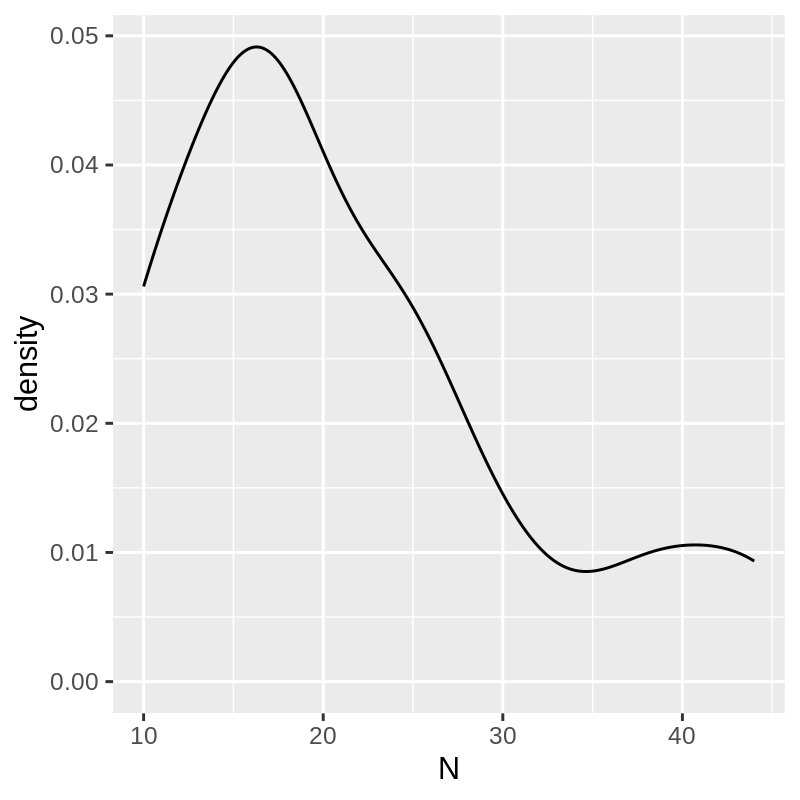

In [ ]:

#let's see the ratings distribution
p <- ggplot(nodes, aes(x=N)) + 
  geom_density()
p

In [ ]:
epsW <- episodes[numVotes > 4500]

In [ ]:
eps <- merge(epsW, titles, by.x = "tconst", by.y = "tconst", all=FALSE)

In [ ]:
eps <- eps[averageRating.x >= 8.5]
#eps

In [ ]:
eps <- eps[, .(tconst, averageRating.x, numVotes.x)]
eps <- merge(eps, principals, by.x = "tconst", by.y = "tconst", all=FALSE)

In [ ]:
eps <- eps[category == "writer"]
wr <- eps[, .N, by = .(nconst)]

In [ ]:
unique(eps$job)

[1] "staff writer"                                                            
  [2] "created by"                                                              
  [3] "written by"                                                              
  [4] "creator"                                                                 
  [5] "head writer"                                                             
  [6] "story editor"                                                            
  [7] "character: \"The Daleks\""                                               
  [8] "showrunner"                                                              
  [9] "executive story editor"                                                  
 [10] "story by"                                                                
 [11] "teleplay by"                                                             
 [12] "writer"                                                                  
 [13] "developed by"                                                            
 [14] "show staff writer"                                                       
 [15] "developed for American television by"                                    
 [16] "based on the BBC series \"The Office\" created by"                       
 [17] "characters: \"Daleks\""                                                  
 [18] "characters: \"Cybermen\""                                                
 [19] "based on the novel \"Darkly Dreaming Dexter\" by"                        
 [20] "developed for television by"                                             
 [21] "original manga"                                                          
 [22] "screenplay"                                                              
 [23] "comic"                                                                   
 [24] "created for television by"                                               
 [25] "manga"                                                                   
 [26] "adr script writer"                                                       
 [27] "series composition"                                                      
 [28] "based upon the novel by"                                                 
 [29] "Loki created by"                                                         
 [30] "based on the characters created by"                                      
 [31] "script"                                                                  
 [32] "adr script writer: english"                                              
 [33] "based on the DC Comic The Sandman by"                                    
 [34] "based on the Israeli Series from HOT that was created by"                
 [35] "based upon the book by"                                                  
 [36] "based on STAR WARS by"                                                   
 [37] "written for television by"                                               
 [38] "based on \"Fire & Blood\" by"                                            
 [39] "based on the book series by"                                             
 [40] "based on characters created for DC by"                                   
 [41] "based on the Dark Horse comic by"                                        
 [42] "based on \"The Wheel of Time\" series by"                                
 [43] "based on the comic books by"                                             
 [44] "characters: Daleks"                                                      
 [45] "character: K-9"                                                          
 [46] "based on the book by"                                                    
 [47] "teleplay"                                                                
 [48] "story"                                                                   
 [49] "based on 'Star Wars' and characters created by"                          
 [50] "based on the series of gra

In [ ]:
wr<- wr[N > 10]

In [ ]:
head(wr)
dim(wr)
setorder(wr, cols = - "N")
#NUMBER ON HOW MANY EPS WRITER WORKED ON

nconst    N 
1 nm0319213 84
2 nm4697729 78
3 nm0471392 75
4 nm0511541 74
5 nm0552333 64
6 nm1125275 57

[1] 99  2

In [ ]:
eps <- merge(wr, eps, by.x = "nconst", by.y = "nconst", all=FALSE) #on what episodes the selected writers worked on

In [ ]:
head(eps)
dim(eps)

nconst    N.x N.y tconst     averageRating.x numVotes.x ordering category
1 nm0000184 22  22  tt11150494 8.8             25522      6        writer  
2 nm0000184 22  22  tt12711128 8.9              5796      9        writer  
3 nm0000184 22  22  tt12981672 8.7             21813      7        writer  
4 nm0000184 22  22  tt13052856 9.3             30145      7        writer  
5 nm0000184 22  22  tt13052868 9.1             22967      7        writer  
6 nm0000184 22  22  tt13052876 8.9             20231      7        writer  
  job                                            characters
1 based on STAR WARS by                          NA        
2 based on 'Star Wars' and characters created by NA        
3 based on STAR WARS by                          NA        
4 based on STAR WARS by                          NA        
5 based on STAR WARS by                          NA        
6 based on STAR WARS by                          NA

[1] 2702   10

In [ ]:
links <- eps %>% select(tconst, nconst, averageRating.x,numVotes.x) %>%
  inner_join(., select(., tconst, nconst), by="tconst") %>%
  rename(from = nconst.x, to = nconst.y) %>%
  filter(from != to) %>%
  unique %>%
  arrange(tconst)
justlinks <- links[, .(from, to)]

In [ ]:
head(justlinks)
dim(justlinks)

from      to       
1 nm0203961 nm0595590
2 nm0203961 nm0622334
3 nm0203961 nm0628285
4 nm0595590 nm0203961
5 nm0595590 nm0622334
6 nm0595590 nm0628285

[1] 5092    2

In [ ]:
nodes <- wr

In [ ]:
#getting rid of double connections: (2, 1) is the same as (1, 2) 
l <- nrow(justlinks)
k <- 1
h <- 1
i <- 1
j <- 1
flag <- rep(1, l)

In [ ]:
length(flag)

[1] 5092

In [ ]:
while(i <= l){
  j <- i
  if(flag[i] == 1){
    while(j <= l){
      if(flag[j] == 1){
        if((justlinks[i,1] == justlinks[j,2]) & (justlinks[i,2] == justlinks[j,1])){
          flag[j] <-  0
          j <- j + 1
          break
          }
      }
      j <- j + 1
    }
  }
  i <- i + 1
}

In [ ]:
df <- data.table(flag) 
justlinks <- cbind(justlinks, df)
links_one_way <- justlinks[flag == 1]

In [ ]:
head(links_one_way)

from      to        flag
1 nm0203961 nm0595590 1   
2 nm0203961 nm0622334 1   
3 nm0203961 nm0628285 1   
4 nm0595590 nm0622334 1   
5 nm0595590 nm0628285 1   
6 nm0622334 nm0628285 1

In [ ]:
#how many times each link repeats?
linksOW_freq <- links_one_way[, list(Freq =.N), by=list(from,to)]
setorder(linksOW_freq, cols = - "Freq") 
head(linksOW_freq)
dim(linksOW_freq)

from      to        Freq
1 nm0552333 nm1125275 57  
2 nm0552333 nm1888967 57  
3 nm1125275 nm1888967 57  
4 nm0509340 nm0511541 55  
5 nm0009190 nm0509340 53  
6 nm0009190 nm0511541 53

[1] 155   3

In [ ]:
dim(nodes)
dim(links)

[1] 99  2

[1] 5092    5

In [ ]:
head(nodes)

nconst    N 
1 nm0319213 84
2 nm4697729 78
3 nm0471392 75
4 nm0511541 74
5 nm0552333 64
6 nm1125275 57

In [ ]:
#only for this specific example we need:
l <- nrow(nodes)
category <- rep("writer", l)
df <- data.table(category) 
nodes <- cbind(nodes, df)

In [ ]:
# let's increase the size of the plot
options(repr.plot.width=8, repr.plot.height=8, repr.plot.res = 200)

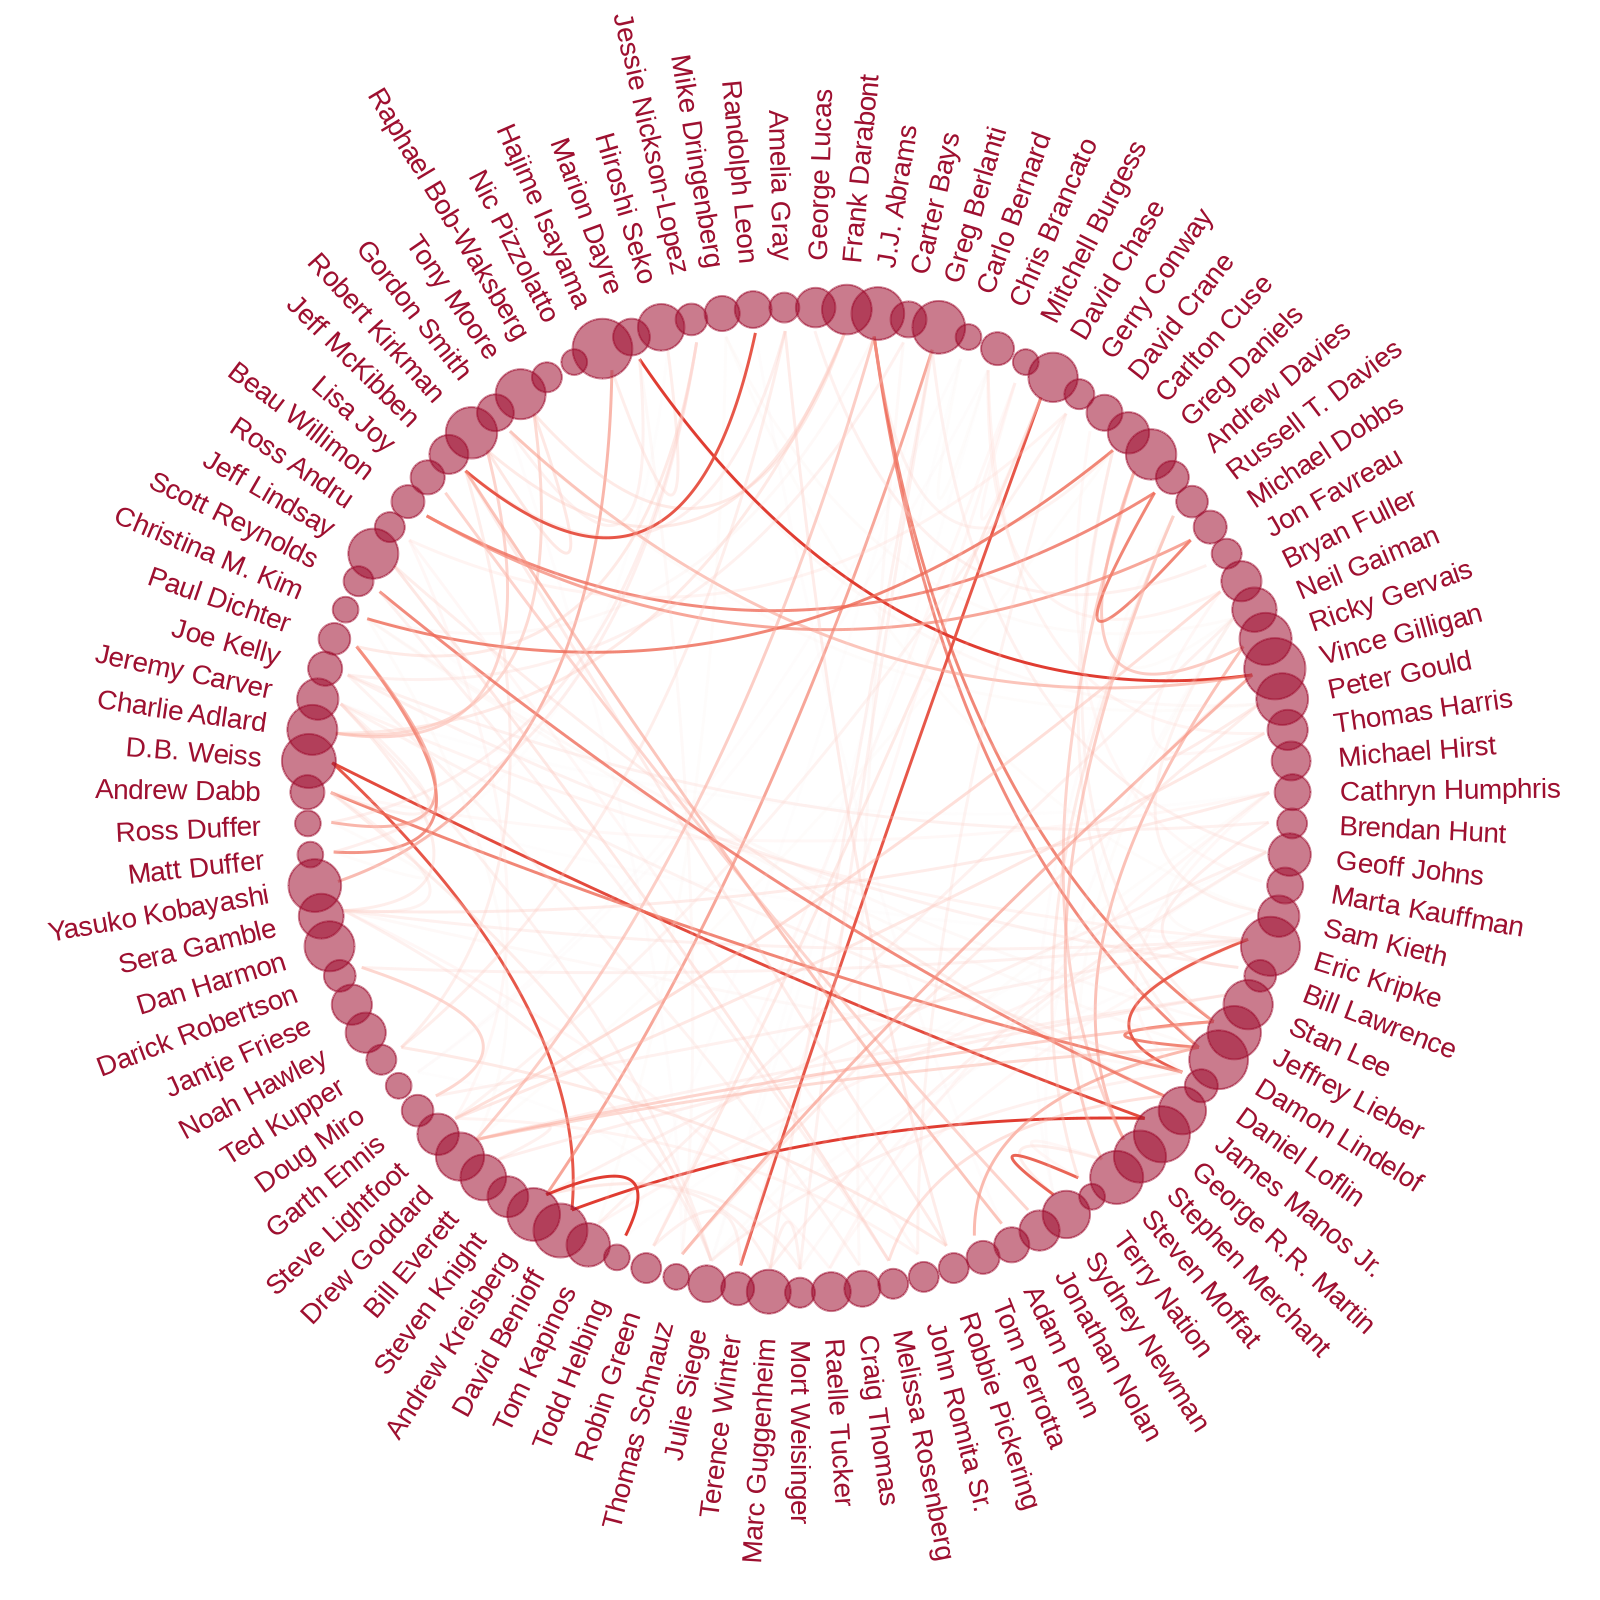

In [ ]:
#MAKING OF THE GRAPH STARTS HERE
d1 <- data.frame(from="origin", to=c("writer"), N=NA)
d2 <- data.frame(from=nodes$category, to=nodes$nconst, N=nodes$N)
hierarchy <- rbind(d1, d2) #edges
all_leaves <- paste("subgroup", seq(1,100), sep="_")

vertices <- data.frame(name = unique(c(as.character(hierarchy$from), as.character(hierarchy$to)))) #,value=runif(16)
vertices <- merge(vertices, nmf, by.x = "name", by.y = "nconst", all.x = TRUE) #connect with actual names,
vertices$group  <-  hierarchy$from[ match( vertices$name, hierarchy$to ) ]
vertices$N <- hierarchy$N[ match( vertices$name, hierarchy$to ) ]

setDT(vertices)
n <-vertices[name == "origin"]
o <- vertices[group == "origin"]
w <- vertices[group == "writer"]
vertices <- rbind(n, o, w)    #sort them like the graph sorts them clockwise
setDF(vertices) 

connect <- linksOW_freq
connect$value <-linksOW_freq$Freq #value is not taken from here

#Let's add information concerning the label we are going to add: angle, horizontal adjustement and potential flip
#calculate the ANGLE of the labels
vertices$id <- NA
myleaves <- which(is.na( match(vertices$name, hierarchy$from) ))
nleaves <- length(myleaves)
vertices$id[ myleaves ] <- seq(1:nleaves)
x <- 91.82    # FORMULA CALCULATE BY HAND (360 * roundup(n/2) / n) - 90
vertices$angle <- x - 360 * vertices$id / nleaves
 
# calculate the alignment of labels: right or left
# If I am on the left part of the plot, my labels have currently an angle < -90
vertices$hjust <- ifelse( vertices$angle < -90, 1, 0)
 
# flip angle BY to make them readable
vertices$angle <- ifelse(vertices$angle < -90, vertices$angle+180, vertices$angle)

# THE ACTUAL PLOT WITH LABELS
mygraph <- graph_from_data_frame( hierarchy, vertices=vertices )

from <- match( connect$from, vertices$name) #sort vertices name first?
to <- match( connect$to, vertices$name)
col <- connect$value #fixes the value problem!

ggraph(mygraph, layout = 'dendrogram', circular = TRUE) + 
  geom_conn_bundle(data = get_con(from = from, to = to, col=col), aes(colour=col, alpha = col), tension = 0.4) +  #aes(colour=col, alpha = col, width = col)
  geom_node_point(aes(filter = leaf, x = x*1.05, y=y*1.05,colour=group, size=N, alpha=1)) +
  scale_edge_color_continuous(low="#fceeed", high="#E03C31") + #cons color
  scale_colour_manual(values= "#9e1030") + #color of dots
  scale_size_continuous( range = c(4,10) ) + #changes the dots size
  geom_node_text(aes(x = x*1.15, y=y*1.15, filter = leaf, label=primaryName, angle = angle, hjust=hjust,colour=group), size=3.5, alpha=1) +
  theme_void() +
  theme(
    legend.position="none",
    plot.margin=unit(c(0,0,0,0),"cm"),
  ) +
  expand_limits(x = c(-1.55, 1.55), y = c(-1.55, 1.55))


#should there be a legend? what to do with it?

## Doctor Who and Others
Intereactions between actors, directors and writers in specific examples of tv series that are well known for good stand alone episodes

In [ ]:
head(ep_series)

tconst    parentTconst seasonNumber episodeNumber
1 tt0114532 tt0874686     1            2           
2 tt0124961 tt0159876    49           15           
3 tt0130097 tt0273026    NA           NA           
4 tt0160398 tt0486531     6           22           
5 tt0173241 tt0240264     1            3           
6 tt0173638 tt1229946     7            1

In [ ]:
series[tconst == "tt0436992"]
episodes[tconst == "tt0436992"] #okay gotta look by parent constants
DWeps <- ep_series[parentTconst == "tt0436992"]
DWeps <- merge(DWeps, titles, by.x = "tconst", by.y = "tconst", all=FALSE)
head(DWeps)

tconst    titleType primaryTitle originalTitle isAdult runtimeMinutes
1 tt0436992 tvSeries  Doctor Who   Doctor Who    FALSE   45            
  genres                 year averageRating numVotes
1 Adventure,Drama,Sci-Fi 2005 8.6           222790

tconst titleType primaryTitle originalTitle isAdult runtimeMinutes genres
     year averageRating numVotes

tconst    parentTconst seasonNumber episodeNumber titleType primaryTitle    
1 tt0562985 tt0436992    1             4            tvEpisode Aliens of London
2 tt0562986 tt0436992    1            12            tvEpisode Bad Wolf        
3 tt0562987 tt0436992    1            11            tvEpisode Boom Town       
4 tt0562988 tt0436992    1             6            tvEpisode Dalek           
5 tt0562989 tt0436992    1             8            tvEpisode Father's Day    
6 tt0562990 tt0436992    2             1            tvEpisode New Earth       
  originalTitle    isAdult runtimeMinutes genres                 year
1 Aliens of London FALSE   45             Adventure,Drama,Sci-Fi 2005
2 Bad Wolf         FALSE   45             Adventure,Drama,Sci-Fi 2005
3 Boom Town        FALSE   45             Adventure,Drama,Sci-Fi 2005
4 Dalek            FALSE   45             Adventure,Drama,Sci-Fi 2005
5 Father's Day     FALSE   45             Adventure,Drama,Sci-Fi 2005
6 New Earth        FALSE   45             Adventure,Drama,Sci-Fi 2006
  averageRating numVotes
1 7.0           7018    
2 8.6           7267    
3 7.1           6421    
4 8.6           7748    
5 8.3           7401    
6 7.4           6741

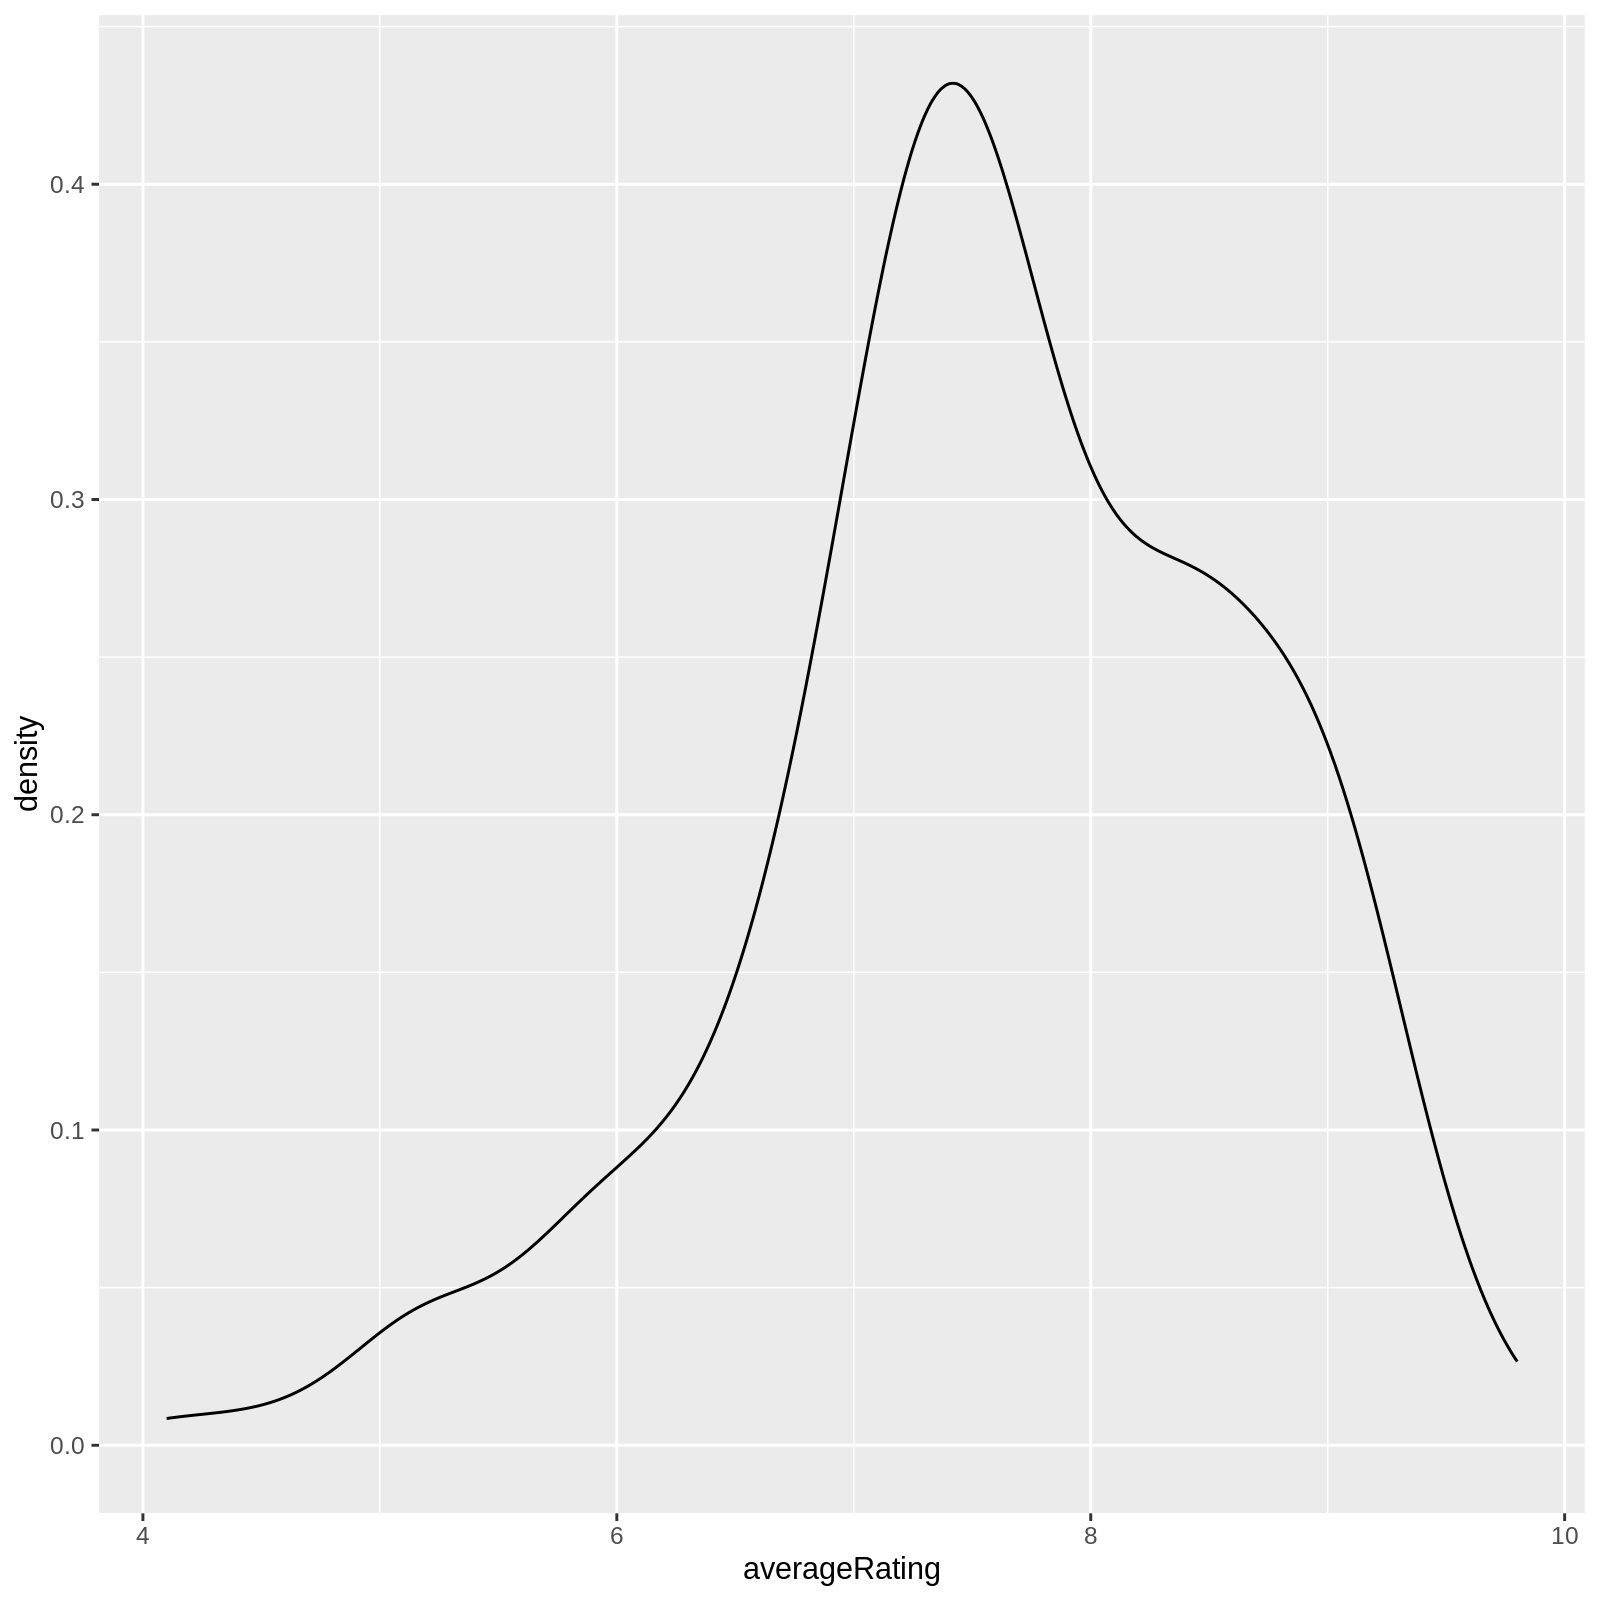

In [ ]:
#let's see the ratings distribution
p <- ggplot(DWeps, aes(x=averageRating)) + 
  geom_density()
p

In [ ]:
DWeps <- DWeps[averageRating > 9.0]

In [ ]:
DWeps <- DWeps[, .(tconst, averageRating, numVotes)]
head(DWeps) #all the eps
dim(DWeps)

tconst    averageRating numVotes
1 tt0562998 9.2           11111   
2 tt0756450 9.2            9010   
3 tt1000252 9.8           20849   
4 tt1000256 9.2            8641   
5 tt1205437 9.1            7282   
6 tt1205438 9.2            8311

[1] 13  3

In [ ]:
unique(DWeps$year)

NULL

In [ ]:
DWepcrew <- merge(DWeps, principals, by.x = "tconst", by.y = "tconst", all=FALSE)
unique(DWepcrew$category)
DWepcrew <- DWepcrew[category == "actor" | category == "actress" | category == "writer" | category == "director"]
DWepcrew <- DWepcrew[, .(tconst, averageRating, nconst, category)]
head(DWepcrew)

[1] "cinematographer" "actor"           "actress"         "director"       
[5] "writer"          "producer"        "composer"        "archive_footage"
[9] "editor"

tconst    averageRating nconst    category
1 tt0562998 9.2           nm0855039 actor   
2 tt0562998 9.2           nm0684877 actress 
3 tt0562998 9.2           nm0164929 actor   
4 tt0562998 9.2           nm0617009 actress 
5 tt0562998 9.2           nm0528186 director
6 tt0562998 9.2           nm0595590 writer

**Change rating here bu rerun upper code**

In [ ]:
DWepcrew <- DWepcrew[averageRating > 9.0]
dim(DWepcrew)

[1] 105   4

In [ ]:
DWepcrew_count <- DWepcrew[, .N, by = .(nconst)]
#DF[  , .(sum_no = sum(no), unq_age = unique(age)), by = id]
dim(DWepcrew_count)

[1] 45  2

In [ ]:
setorder(DWepcrew, cols = "nconst")
head(DWepcrew)

tconst    averageRating nconst    category
1 tt2779318 9.3           nm0000457 actor   
2 tt4701542 9.5           nm0003080 director
3 tt6340138 9.1           nm0003080 director
4 tt1205440 9.4           nm0005094 actress 
5 tt1208129 9.3           nm0005094 actress 
6 tt1607759 9.1           nm0005094 actress

In [ ]:
nodesDW <- unique(DWepcrew, by = "nconst") #wait, calc how many times they repeat
nodesDW <- merge(nodesDW, DWepcrew_count, by.x = "nconst", by.y = "nconst", all=FALSE)
setorder(nodesDW, cols = "nconst")

In [ ]:
nodesDW <- nodesDW[, .(nconst, category, N)]
#nodesDW <- nodesDW[1:100,]
head(nodesDW)
dim(nodesDW)

nconst    category N
1 nm0000457 actor    1
2 nm0003080 director 2
3 nm0005094 actress  3
4 nm0048276 writer   1
5 nm0132600 director 1
6 nm0134922 actor    2

[1] 45  3

In [ ]:
unique(nodesDW$category)

[1] "actor"    "director" "actress"  "writer"

### Tiny test (Ignore)
**Trying out on tiny test data**

In [ ]:
#tiny test data
DT = data.table(
  tconst = c("t1","t1","t1","t2","t1","t2"),
  nconst = c(1,2,3,3,4,5),
  cat = c("dir", "wri", "act", "act", "wri", "dir")
)
DT

tconst nconst cat
1 t1     1      dir
2 t1     2      wri
3 t1     3      act
4 t2     3      act
5 t1     4      wri
6 t2     5      dir

In [ ]:
DTepcrew_count <- DT[, .N, by = .(nconst)]
nodesDT <- unique(DT, by = "nconst") #wait, calc how many times they repeat
nodesDT <- merge(nodesDT, DTepcrew_count, by.x = "nconst", by.y = "nconst", all=FALSE)
setorder(nodesDT, cols = "nconst")
nodesDT

nconst tconst cat N
1 1      t1     dir 1
2 2      t1     wri 1
3 3      t1     act 2
4 4      t1     wri 1
5 5      t2     dir 1

In [ ]:
linksDT <- DT %>% select(tconst, nconst, cat) %>%
  inner_join(., select(., tconst, nconst), by="tconst") %>%
  rename(FROM = nconst.x, TO = nconst.y) %>%
  filter(FROM != TO) %>%
  unique 

In [ ]:
unique(linksDT[,c('FROM','TO')])

In [ ]:
justlinksDT <- linksDT[, .(FROM, TO)]
#justlinksDT <- justlinksDT[, jung := paste(FROM,TO)] #simboliu jungimas
#justlinksDT <- justlinksDT[, jung2 := paste(TO,FROM)]

In [ ]:
justlinksDT

In [ ]:
#code to make links one way
l <- nrow(justlinksDT)
k <- 1
h <- 1
i <- 1
j <- 1
flag <- rep(1, l)

while(i <= l){
  j <- i
  if(flag[i] == 1){
    while(j <= l){
      if(flag[j] == 1){
        if((justlinksDT[i,1] == justlinksDT[j,2]) & (justlinksDT[i,2] == justlinksDT[j,1]))
        {flag[j] <-  0}
      }
      j <- j + 1
    }
  }
  i <- i + 1
}

df <- data.table(flag) 
justlinksDT <- cbind(justlinksDT, df)
links_one_way <- justlinksDT[flag == 1]

In [ ]:
links_one_way

In [ ]:
install.packages("igraph")
library(igraph)

In [ ]:
# let's increase the size of the plot
options(repr.plot.width=4, repr.plot.height=4, repr.plot.res = 200)

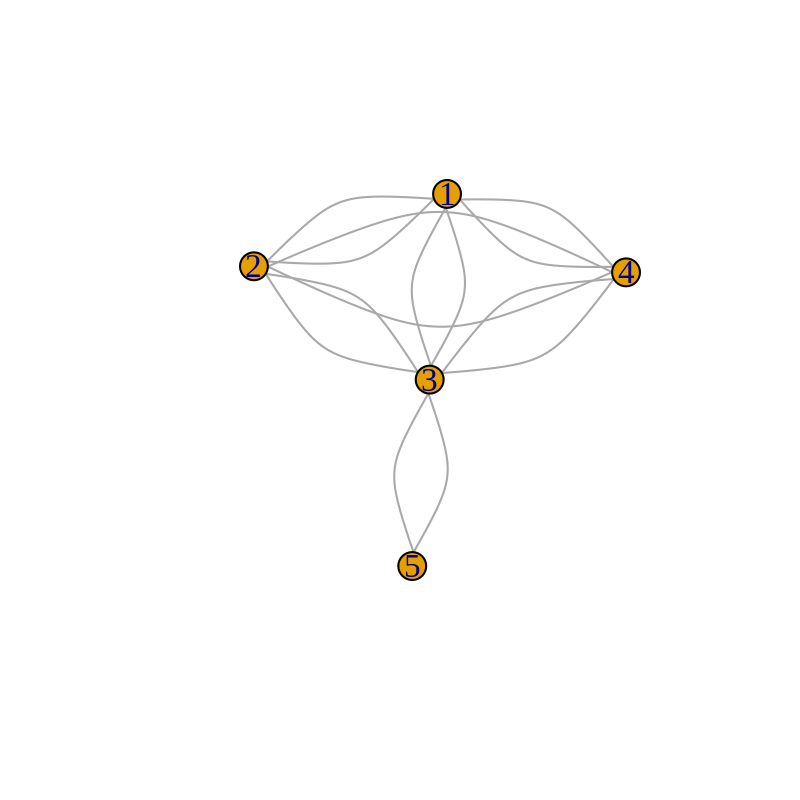

In [ ]:
#before making the links one way
network <- graph_from_data_frame(d=justlinksDT, directed=F) 
plot(network)

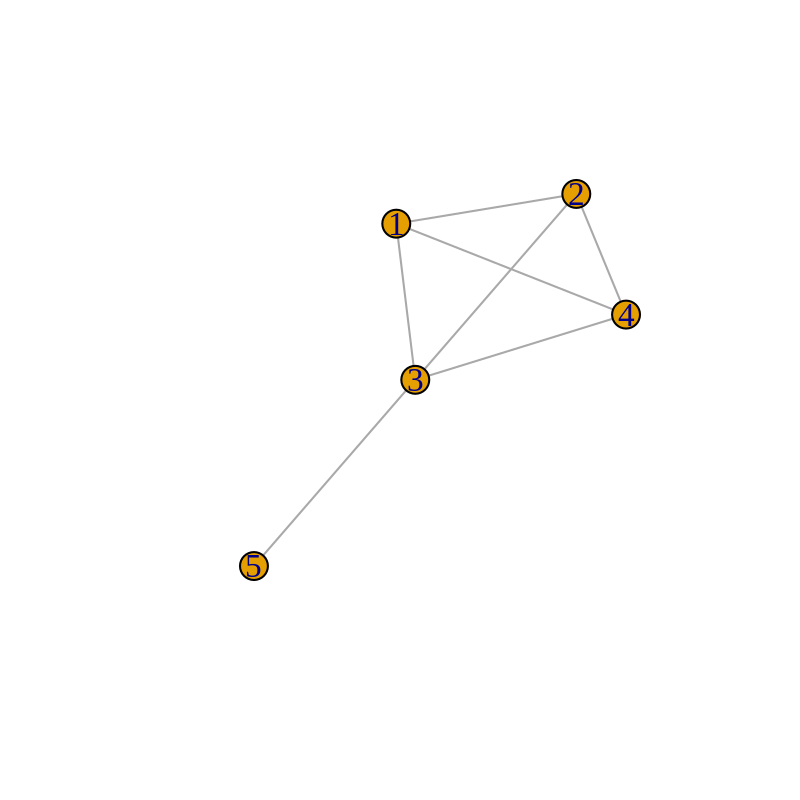

In [ ]:
#after making the links one way
network <- graph_from_data_frame(d=links_one_way, directed=F) 
plot(network)

**End of test**

### Merging a table on itself to get links by tconst

In [ ]:
linksDW <- DWepcrew %>% select(tconst, nconst, averageRating) %>%
  inner_join(., select(., tconst, nconst), by="tconst") %>%
  rename(FROM = nconst.x, TO = nconst.y) %>%
  filter(FROM != TO) %>%
  unique %>%
  arrange(tconst)

In [ ]:
head(linksDW, 10)
dim(linksDW)

tconst    FROM      averageRating TO       
1  tt0562998 nm0164929 9.2           nm0528186
2  tt0562998 nm0164929 9.2           nm0595590
3  tt0562998 nm0164929 9.2           nm0617009
4  tt0562998 nm0164929 9.2           nm0628285
5  tt0562998 nm0164929 9.2           nm0684877
6  tt0562998 nm0164929 9.2           nm0855039
7  tt0562998 nm0528186 9.2           nm0164929
8  tt0562998 nm0528186 9.2           nm0595590
9  tt0562998 nm0528186 9.2           nm0617009
10 tt0562998 nm0528186 9.2           nm0628285

[1] 762   4

In [ ]:
justlinksDW <- linksDW[, .(FROM, TO)]
setnames(justlinksDW, old = c('FROM', 'TO'), 
         new = c('from','to'))
dim(justlinksDW)

[1] 762   2

In [ ]:
install.packages("igraph")
library(igraph)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("igraph"):
“installation of package ‘igraph’ had non-zero exit status”


In [ ]:
network <- graph_from_data_frame(d=justlinksDW, directed=T) 
plot(network)
#TODO color these differently
#get rid of double connections

In [ ]:
head(nodesDW)

ERROR: ignored

### Actual graph

In [ ]:
#run this later
#mygraph <- graph_from_data_frame( hierarchy, vertices=vertices )
# This is a network object, you visualize it as a network like shown in the network section!
 
# With igraph: 
#plot(mygraph, vertex.label="", edge.arrow.size=0, vertex.size=2)
 
# With ggraph:
#ggraph(mygraph, layout = 'dendrogram', circular = FALSE) + 
  #geom_edge_link() +
  #theme_void()

ERROR: ignored

In [ ]:
install.packages('RColorBrewer')
library(RColorBrewer)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# let's increase the size of the plot
options(repr.plot.width=7, repr.plot.height=6, repr.plot.res = 200)

In [ ]:
vertices

In [ ]:
#MAKING OF THE GRAPH STARTS HERE
d1 <- data.frame(from="origin", to=c("actor","actress","director","writer"), N=NA)
d2 <- data.frame(from=nodesDW$category, to=nodesDW$nconst, N=nodesDW$N)
hierarchy <- rbind(d1, d2) #edges
all_leaves <- paste("subgroup", seq(1,100), sep="_")

vertices <- data.frame(name = unique(c(as.character(hierarchy$from), as.character(hierarchy$to)))) #,value=runif(16)
vertices <- merge(vertices, nmf, by.x = "name", by.y = "nconst", all.x = TRUE) #connect with actual names,
vertices$group  <-  hierarchy$from[ match( vertices$name, hierarchy$to ) ]
vertices$N <- hierarchy$N[ match( vertices$name, hierarchy$to ) ]

setDT(vertices)
n <-vertices[name == "origin"]
o <- vertices[group == "origin"]
d <- vertices[group == "director"]
w <- vertices[group == "writer"]
a <-vertices[group == "actor"]
ac <- vertices[group == "actress"]
vertices <- rbind(n, o, a, ac, d, w)    #sort them like the graph sorts them clockwise
setDF(vertices) 

connect <- justlinksDW
connect$value <-linksDW$averageRating #value is not taken from here

In [ ]:
#Let's add information concerning the label we are going to add: angle, horizontal adjustement and potential flip
#calculate the ANGLE of the labels
vertices$id <- NA
myleaves <- which(is.na( match(vertices$name, hierarchy$from) ))
nleaves <- length(myleaves)
vertices$id[ myleaves ] <- seq(1:nleaves)
x <- 94    # FORMULA CALCULATE BY HAND 360 * roundup(n/2) / n - 90
vertices$angle <- x - 360 * vertices$id / nleaves
 
# calculate the alignment of labels: right or left
# If I am on the left part of the plot, my labels have currently an angle < -90
vertices$hjust <- ifelse( vertices$angle < -90, 1, 0)
 
# flip angle BY to make them readable
vertices$angle <- ifelse(vertices$angle < -90, vertices$angle+180, vertices$angle)

In [ ]:
nleaves

[1] 45

In [ ]:
vertices$angle

[1]  NA  NA  NA  NA  NA  86  78  70  62  54  46  38  30  22  14   6  -2 -10 -18
[20] -26 -34 -42 -50 -58 -66 -74 -82 -90  82  74  66  58  50  42  34  26  18  10
[39]   2  -6 -14 -22 -30 -38 -46 -54 -62 -70 -78 -86

In [ ]:
vertices

In [ ]:
install.packages("wesanderson")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(wesanderson)

In [ ]:
# let's increase the size of the plot
options(repr.plot.width=8, repr.plot.height=8, repr.plot.res = 200)

Warning message in geom_conn_bundle(data = get_con(from = from, to = to, col = col), :
“Ignoring unknown parameters: `guide`”


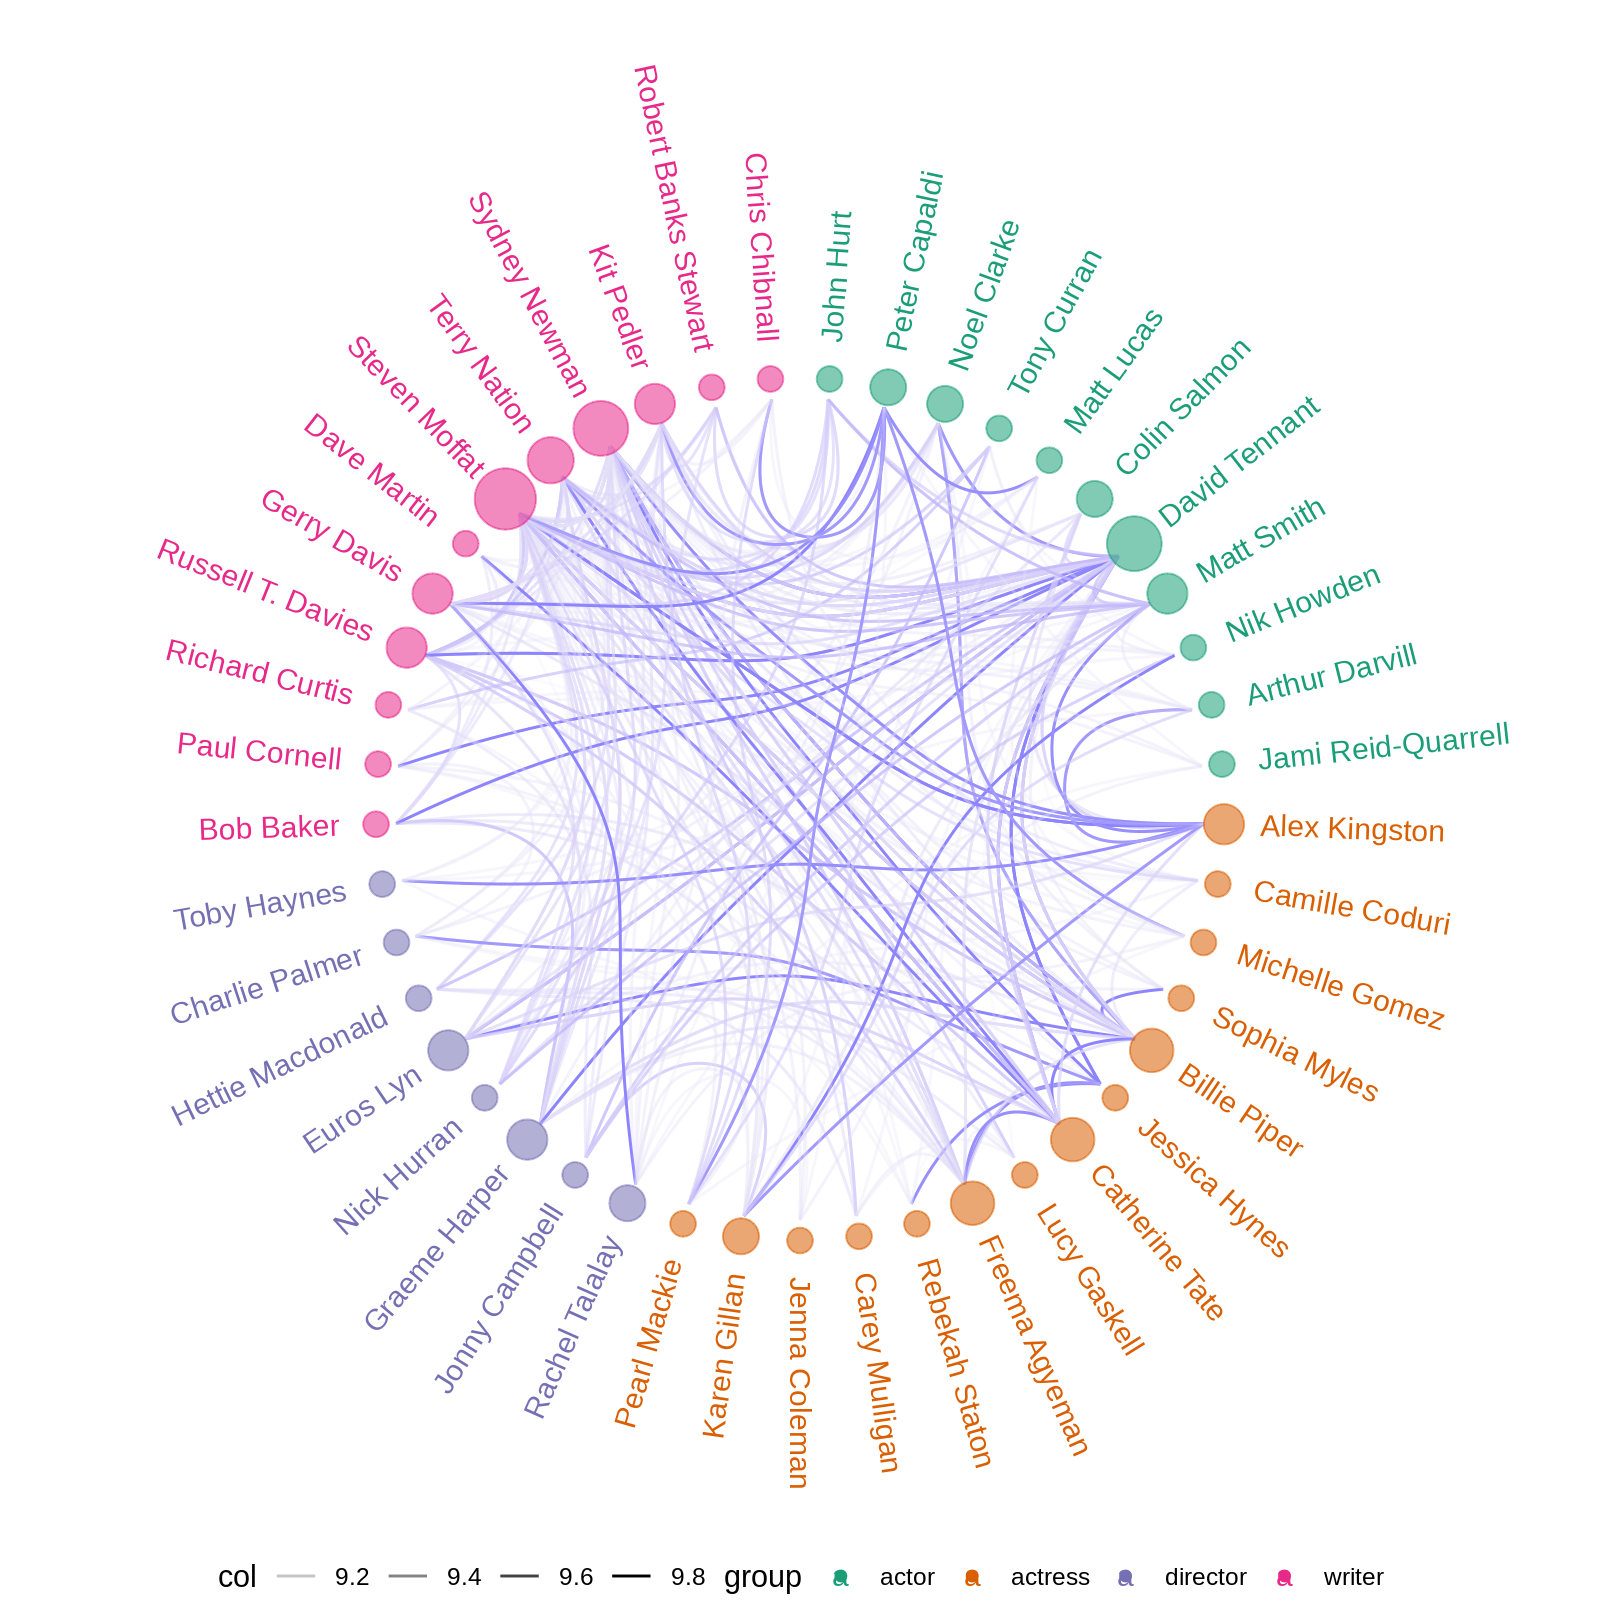

In [ ]:
# plot with labels WORK IN PROGRESS
mygraph <- graph_from_data_frame( hierarchy, vertices=vertices )

from <- match( connect$from, vertices$name) #sort vertices name first?
to <- match( connect$to, vertices$name)
col <- connect$value #fixes the value problem!

pal <- wes_palette("GrandBudapest2", 4, type = "discrete")

ggraph(mygraph, layout = 'dendrogram', circular = TRUE) + 
  geom_conn_bundle(data = get_con(from = from, to = to, col=col), aes(colour=col, alpha = col), tension = 0.4,guide=FALSE) +  #aes(colour=col, alpha = col, width = col)
  geom_node_point(aes(filter = leaf, x = x*1.05, y=y*1.05,colour=group, size=N, alpha=1)) +
  scale_edge_color_continuous(low="#f1f0f5", high="#8d84ff",guide=FALSE) + #cons color
  scale_colour_manual(values= rep( brewer.pal(5,"Dark2") , 30)) + #color of dots
  scale_size_continuous( range = c(4,10) ) + #changes the dots size
  geom_node_text(aes(x = x*1.14, y=y*1.14, filter = leaf, label=primaryName, angle = angle, hjust=hjust,colour=group), size=3.8, alpha=1) +
  theme_void() +
  theme(
    legend.position="bottom",
    plot.margin=unit(c(0,0,0,0),"cm"),
  ) +
  guides(size = FALSE, alpha = FALSE , width = FALSE, scale_edge_color_continuous = FALSE) +
  expand_limits(x = c(-1.8, 1.8), y = c(-1.6, 1.8))


#should there be a legend? what to do with it?

In [ ]:
actual_name_vertices <- merge(vertices, nmf, by.x = "name", by.y = "nconst", all.x = TRUE)
vertices <- actual_name_vertices %>% select(group, N, id, angle, hjust, primaryName)

In [ ]:
vertices

In [ ]:
#coloring etc

### Avatar TLA

In [ ]:
aka[title == "Avatar: The Last Airbender"] #tt0417299
series[tconst == "tt0417299"]

In [ ]:
#episodes[tconst == "tt0417299"] #okay gotta look by parent constants
AAeps <- ep_series[parentTconst == "tt0417299"]
AAeps <- merge(AAeps, titles, by.x = "tconst", by.y = "tconst", all=FALSE)

AAeps <- AAeps[averageRating >= 9.0]
AAeps <- AAeps[, .(tconst, averageRating, numVotes)]
AAepcrew <- merge(AAeps, principals, by.x = "tconst", by.y = "tconst", all=FALSE)

unique(AAepcrew$category)
dim(AAeps)
dim(AAepcrew)

[1] "writer"   "actor"    "actress"  "director"

[1] 21  3

[1] 210   8

In [ ]:
#check crew cat first
AAepcrew <- AAepcrew[category == "writer" | category == "director"]
AAepcrew <- AAepcrew[, .(tconst, averageRating, nconst, category)]
#head(DWepcrew)
head(AAepcrew)
dim(AAepcrew)

AAepcrew_count <- AAepcrew[, .N, by = .(nconst)]
setorder(AAepcrew, cols = "nconst")
nodesAA <- unique(AAepcrew, by = "nconst") #wait, calc how many times they repeat
nodesAA <- merge(nodesAA, AAepcrew_count, by.x = "nconst", by.y = "nconst", all=FALSE)
setorder(nodesAA, cols = "nconst")
nodesAA <- nodesAA[, .(nconst, category, N)]
head(nodesAA)
dim(nodesAA)
linksAA <- AAepcrew %>% select(tconst, nconst, averageRating) %>%
  inner_join(., select(., tconst, nconst), by="tconst") %>%
  rename(from = nconst.x, to = nconst.y) %>%
  filter(from != to) %>%
  unique %>%
  arrange(tconst)
justlinksAA <- linksAA[, .(from, to)]

tconst    averageRating nconst    category
1 tt0516780 9.3           nm2419560 writer  
2 tt0516780 9.3           nm1396048 director
3 tt0516780 9.3           nm0534041 director
4 tt0516780 9.3           nm0227204 writer  
5 tt0516780 9.3           nm1665983 writer  
6 tt0516780 9.3           nm1132209 writer

[1] 126   4

nconst    category N 
1 nm0227204 writer   21
2 nm0247063 writer    2
3 nm0373388 writer    7
4 nm0534041 director  4
5 nm1132209 writer   20
6 nm1348661 writer    1

[1] 17  3

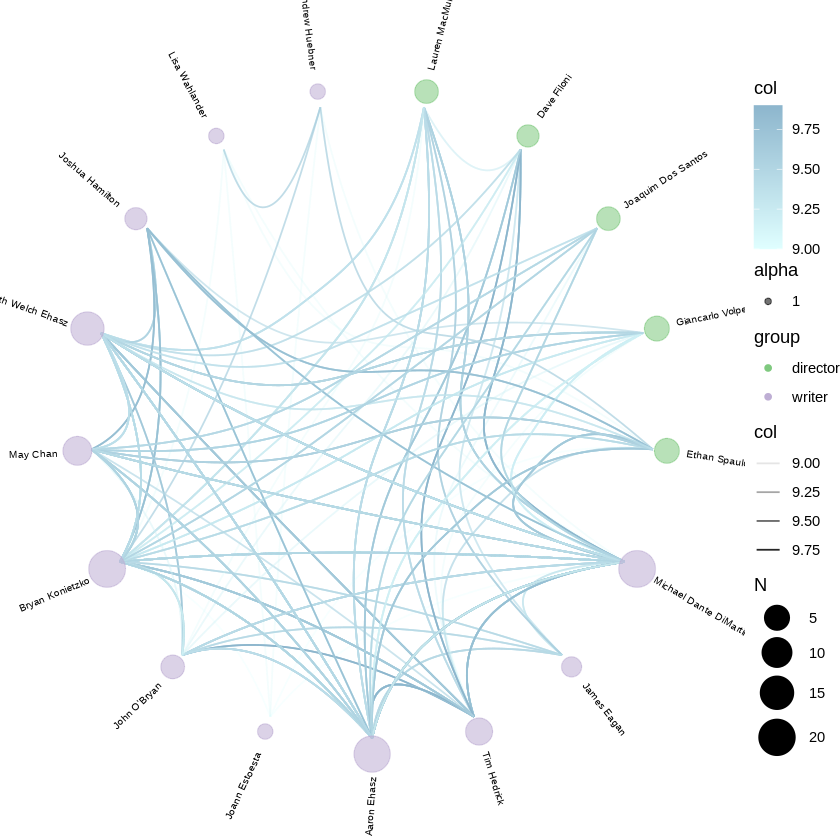

In [ ]:
#MAKING OF THE GRAPH STARTS HERE
d1 <- data.frame(from="origin", to=c("director","writer"), N=NA)
d2 <- data.frame(from=nodesAA$category, to=nodesAA$nconst, N=nodesAA$N)
hierarchy <- rbind(d1, d2) #edges
all_leaves <- paste("subgroup", seq(1,100), sep="_")

vertices <- data.frame(name = unique(c(as.character(hierarchy$from), as.character(hierarchy$to)))) #,value=runif(16)
vertices <- merge(vertices, nmf, by.x = "name", by.y = "nconst", all.x = TRUE) #connect with actual names,
vertices$group  <-  hierarchy$from[ match( vertices$name, hierarchy$to ) ]
vertices$N <- hierarchy$N[ match( vertices$name, hierarchy$to ) ]

setDT(vertices)
n <-vertices[name == "origin"]
o <- vertices[group == "origin"]
d <- vertices[group == "director"]
w <- vertices[group == "writer"]
#a <-vertices[group == "actor"]
#ac <- vertices[group == "actress"]
vertices <- rbind(n, o, d, w)    #sort them like the graph sorts them clockwise
setDF(vertices) 

connect <- justlinksAA
connect$value <-linksAA$averageRating #value is not taken from here

#Let's add information concerning the label we are going to add: angle, horizontal adjustement and potential flip
#calculate the ANGLE of the labels
vertices$id <- NA
myleaves <- which(is.na( match(vertices$name, hierarchy$from) ))
nleaves <- length(myleaves)
vertices$id[ myleaves ] <- seq(1:nleaves)
x <- 96.67    # FORMULA CALCULATE BY HAND 360 * roundup(n/2) / 2 - 90
vertices$angle <- x - 360 * vertices$id / nleaves
 
# calculate the alignment of labels: right or left
# If I am on the left part of the plot, my labels have currently an angle < -90
vertices$hjust <- ifelse( vertices$angle < -90, 1, 0)
 
# flip angle BY to make them readable
vertices$angle <- ifelse(vertices$angle < -90, vertices$angle+180, vertices$angle)

# THE ACTUAL PLOT WITH LABELS
mygraph <- graph_from_data_frame( hierarchy, vertices=vertices )

from <- match( connect$from, vertices$name) #sort vertices name first?
to <- match( connect$to, vertices$name)
col <- connect$value #fixes the value problem!

ggraph(mygraph, layout = 'dendrogram', circular = TRUE) + 
  geom_conn_bundle(data = get_con(from = from, to = to, col=col), aes(colour=col, alpha = col), tension = 0.4) +  #aes(colour=col, alpha = col, width = col)
  geom_node_point(aes(filter = leaf, x = x*1.05, y=y*1.05,colour=group, size=N, alpha=1)) +
  scale_edge_color_continuous(low="lightcyan1", high="lightskyblue3") + #cons color
  scale_colour_manual(values= rep( brewer.pal(5,"Accent") , 30)) + #color of dots
  scale_size_continuous( range = c(4,10) ) + #changes the dots size
  geom_node_text(aes(x = x*1.12, y=y*1.12, filter = leaf, label=primaryName, angle = angle, hjust=hjust), size=2.2, alpha=1) +
  theme_void() +
  theme(
    plot.margin=unit(c(0,0,0,0),"cm"),
  ) +
  expand_limits(x = c(-1.2, 1.2), y = c(-1.2, 1.2))


#should there be a legend? what to do with it?

### Mr Robot

In [ ]:
aka[title == "Mr. Robot"] #tt4158110
series[tconst == "tt4158110"]

In [ ]:
#episodes[tconst == "tt0417299"] #okay gotta look by parent constants
MReps <- ep_series[parentTconst == "tt4158110"]
MReps <- merge(MReps, titles, by.x = "tconst", by.y = "tconst", all=FALSE)

MReps <- MReps[averageRating >= 9.0]
MReps <- MReps[, .(tconst, averageRating, numVotes)]
MRepcrew <- merge(MReps, principals, by.x = "tconst", by.y = "tconst", all=FALSE)

unique(MRepcrew$category)
dim(MReps)
dim(MRepcrew)

[1] "producer"        "actor"           "actress"         "director"       
[5] "writer"          "editor"          "composer"        "cinematographer"

[1] 22  3

[1] 220   8

In [ ]:
#check crew cat first
MRepcrew <- MRepcrew[category == "writer" | category == "director" ]
MRepcrew <- MRepcrew[, .(tconst, averageRating, nconst, category)]
#head(DWepcrew)
head(MRepcrew)
dim(MRepcrew)

MRepcrew_count <- MRepcrew[, .N, by = .(nconst)]
setorder(MRepcrew, cols = "nconst")
nodesMR <- unique(MRepcrew, by = "nconst") #wait, calc how many times they repeat
nodesMR <- merge(nodesMR, MRepcrew_count, by.x = "nconst", by.y = "nconst", all=FALSE)
setorder(nodesMR, cols = "nconst")
nodesMR <- nodesMR[, .(nconst, category, N)]
head(nodesMR)
dim(nodesMR)
linksMR <- MRepcrew %>% select(tconst, nconst, averageRating) %>%
  inner_join(., select(., tconst, nconst), by="tconst") %>%
  rename(from = nconst.x, to = nconst.y) %>%
  filter(from != to) %>%
  unique %>%
  arrange(tconst)
justlinksMR <- linksMR[, .(from, to)]

tconst     averageRating nconst    category
1 tt10883092 9.8           nm1322753 director
2 tt10883092 9.8           nm0681852 writer  
3 tt10883092 9.8           nm8571786 writer  
4 tt10883092 9.8           nm1219676 writer  
5 tt10883092 9.8           nm2981592 writer  
6 tt4652838  9.2           nm0649117 director

[1] 96  4

nconst    category N
1 nm0110644 director 1
2 nm0649117 director 1
3 nm0671952 writer   8
4 nm0681852 writer   9
5 nm0775358 director 1
6 nm1037986 writer   5

[1] 14  3

Warning message in geom_conn_bundle(data = get_con(from = from, to = to, col = col), :
“Ignoring unknown parameters: `guide`”


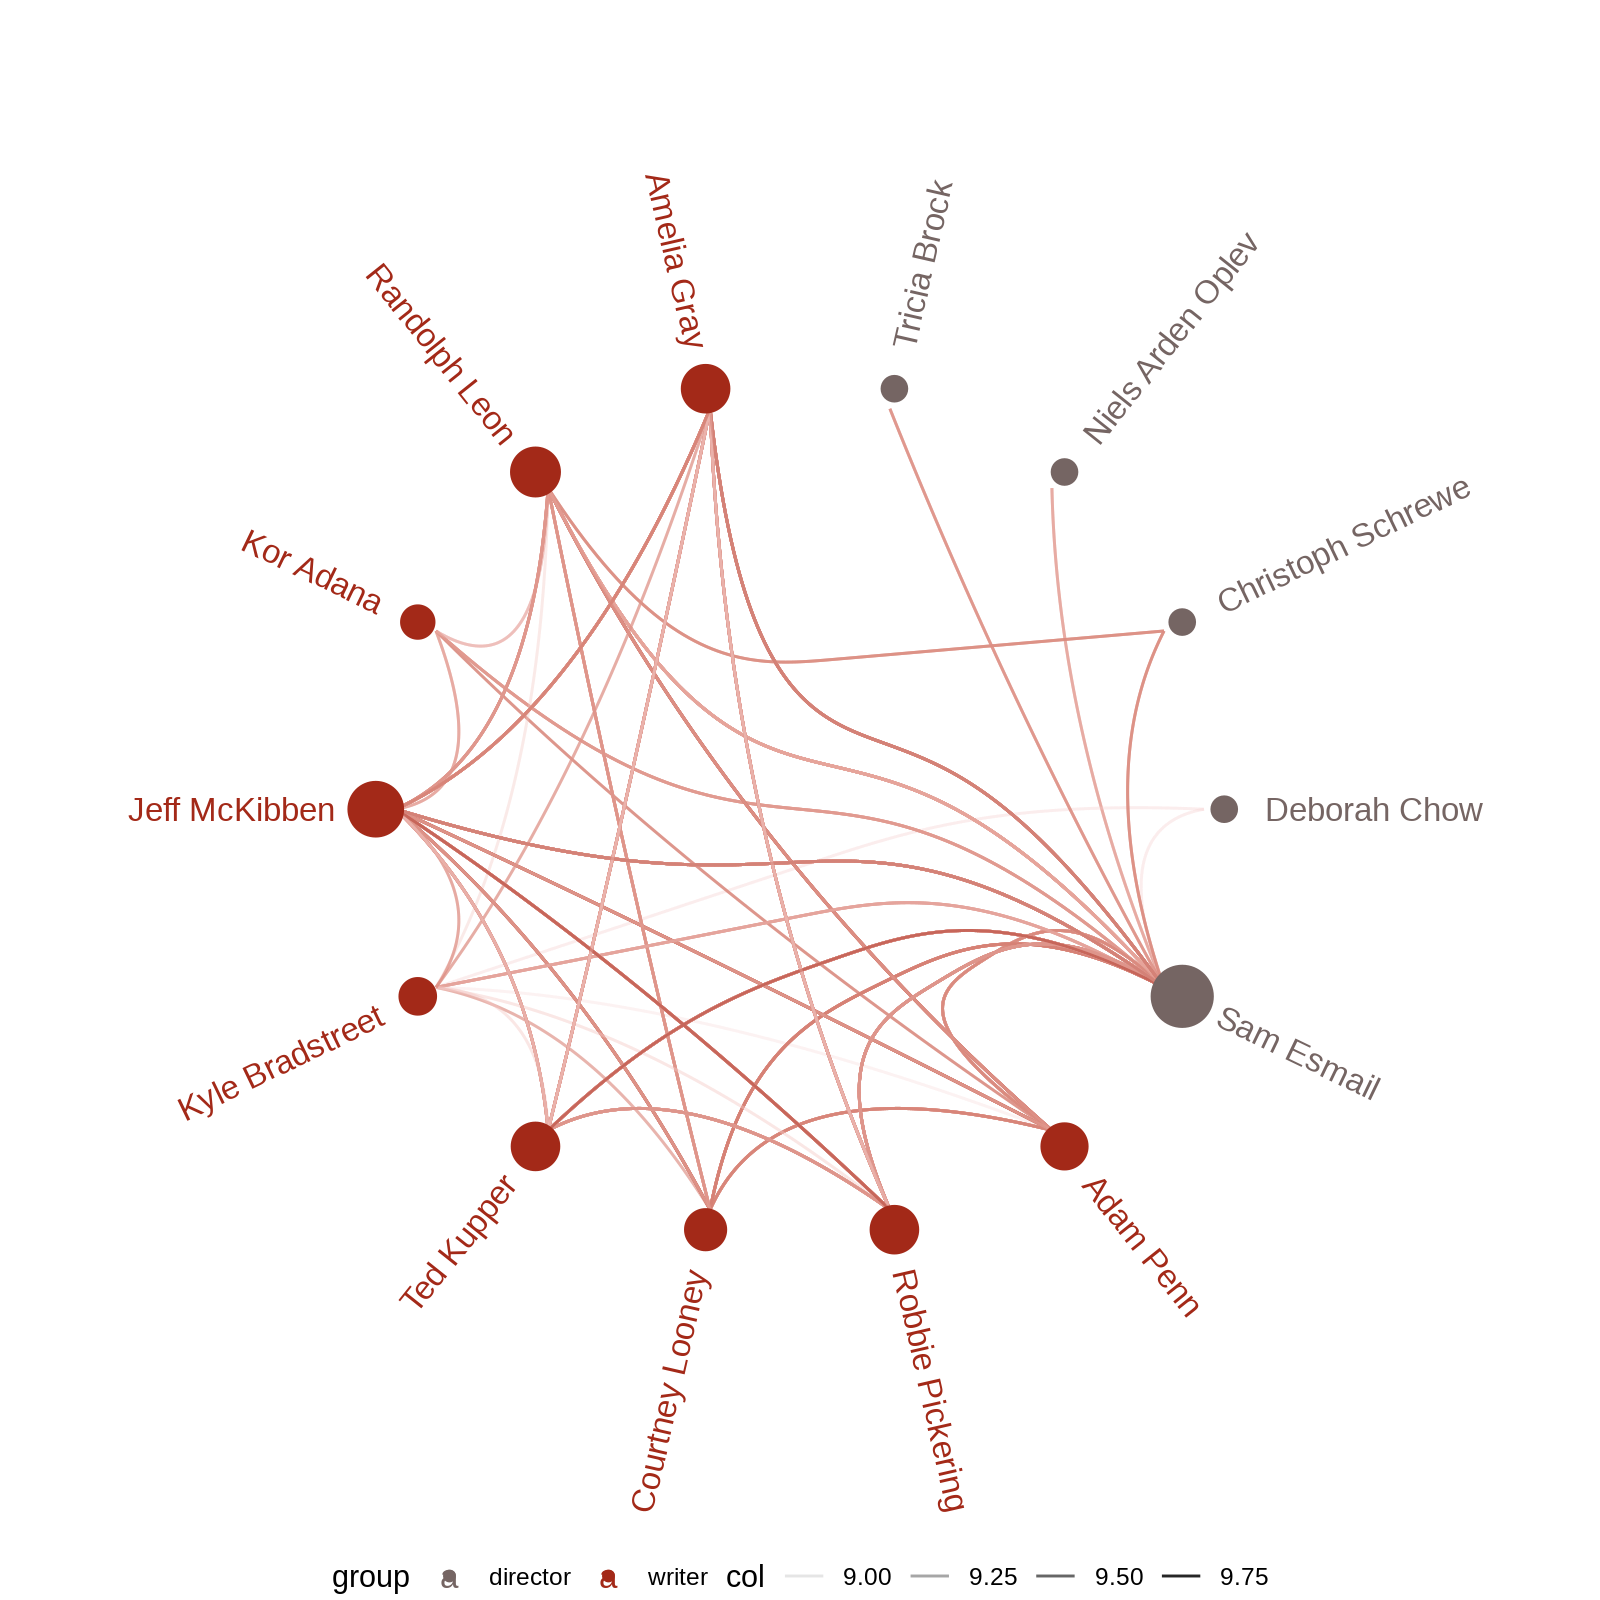

In [ ]:
#MAKING OF THE GRAPH STARTS HERE
d1 <- data.frame(from="origin", to=c("director","writer"), N=NA)
d2 <- data.frame(from=nodesMR$category, to=nodesMR$nconst, N=nodesMR$N)
hierarchy <- rbind(d1, d2) #edges
all_leaves <- paste("subgroup", seq(1,100), sep="_")

vertices <- data.frame(name = unique(c(as.character(hierarchy$from), as.character(hierarchy$to)))) #,value=runif(16)
vertices <- merge(vertices, nmf, by.x = "name", by.y = "nconst", all.x = TRUE) #connect with actual names,
vertices$group  <-  hierarchy$from[ match( vertices$name, hierarchy$to ) ]
vertices$N <- hierarchy$N[ match( vertices$name, hierarchy$to ) ]

setDT(vertices)
n <-vertices[name == "origin"]
o <- vertices[group == "origin"]
d <- vertices[group == "director"]
w <- vertices[group == "writer"]
#a <-vertices[group == "actor"]
#ac <- vertices[group == "actress"]
vertices <- rbind(n, o, d, w)    #sort them like the graph sorts them clockwise
setDF(vertices) 

connect <- justlinksMR
connect$value <-linksMR$averageRating #value is not taken from here

#Let's add information concerning the label we are going to add: angle, horizontal adjustement and potential flip
#calculate the ANGLE of the labels
vertices$id <- NA
myleaves <- which(is.na( match(vertices$name, hierarchy$from) ))
nleaves <- length(myleaves)
vertices$id[ myleaves ] <- seq(1:nleaves)
x <- 102.85    # FORMULA CALCULATE BY HAND 360 * roundup(n/2) / 2 - 90
vertices$angle <- x - 360 * vertices$id / nleaves
 
# calculate the alignment of labels: right or left
# If I am on the left part of the plot, my labels have currently an angle < -90
vertices$hjust <- ifelse( vertices$angle < -90, 1, 0)
 
# flip angle BY to make them readable
vertices$angle <- ifelse(vertices$angle < -90, vertices$angle+180, vertices$angle)

# THE ACTUAL PLOT WITH LABELS
mygraph <- graph_from_data_frame( hierarchy, vertices=vertices )

from <- match( connect$from, vertices$name) #sort vertices name first?
to <- match( connect$to, vertices$name)
col <- connect$value #fixes the value problem!

ggraph(mygraph, layout = 'dendrogram', circular = TRUE) + 
  geom_conn_bundle(data = get_con(from = from, to = to, col=col), aes(colour=col, alpha = col), tension = 0.4,guide=FALSE) +  #aes(colour=col, alpha = col, width = col)
  geom_node_point(aes(filter = leaf, x = x*1.05, y=y*1.05,colour=group, size=N)) +
  scale_edge_color_continuous(low="#fcdfdc", high="#c7665a",guide=FALSE) + #cons color
  scale_colour_manual(values= c("#756563", "#a32918")) + #color of dots
  scale_size_continuous( range = c(4,10) ) + #changes the dots size
  geom_node_text(aes(x = x*1.15, y=y*1.15, filter = leaf, label=primaryName, angle = angle, hjust=hjust,colour=group), size=4.2, alpha=1) +
  theme_void() +
  theme(
    legend.position="bottom",
    plot.margin=unit(c(0,0,0,0),"cm"),
  ) +
  guides(size = FALSE, alpha = FALSE , width = FALSE, scale_edge_color_continuous = FALSE) +
  expand_limits(x = c(-1.8, 1.8), y = c(-1.6, 1.8))


#should there be a legend? what to do with it?
#wait Sam Esmail was both WRITER AND DIRECTOR NO?

## Sherlock

In [ ]:
#aka[title == "Sherlock"] #tt4158110
series[tconst == "tt1475582"]

tconst    titleType primaryTitle originalTitle isAdult runtimeMinutes
1 tt1475582 tvSeries  Sherlock     Sherlock      FALSE   88            
  genres              year averageRating numVotes
1 Crime,Drama,Mystery 2017 9.1           915102

In [ ]:
#episodes[tconst == "tt0417299"] #okay gotta look by parent constants
SHeps <- ep_series[parentTconst == "tt1475582"]
SHeps <- merge(SHeps, titles, by.x = "tconst", by.y = "tconst", all=FALSE)
#let's see the ratings distribution
p <- ggplot(SHeps, aes(x=averageRating)) + 
  geom_density()
p
SHeps <- SHeps[averageRating >= 7.0]
SHeps <- SHeps[, .(tconst, averageRating, numVotes)]
SHepcrew <- merge(SHeps, principals, by.x = "tconst", by.y = "tconst", all=FALSE)

unique(SHepcrew$category)
dim(SHeps)
dim(SHepcrew)

In [ ]:
#check crew cat first
SHepcrew <- SHepcrew[category == "writer" | category == "director" | category == "producer"| category == "actress"| category == "actor"| category == "cinematographer"]
SHepcrew <- SHepcrew[, .(tconst, averageRating, nconst, category)]
#head(DWepcrew)
head(SHepcrew)
dim(SHepcrew)
unique(SHepcrew$category)
SHepcrew_count <- SHepcrew[, .N, by = .(nconst)]
setorder(SHepcrew, cols = "nconst")
nodesSH <- unique(SHepcrew, by = "nconst") #wait, calc how many times they repeat
nodesSH <- merge(nodesSH, SHepcrew_count, by.x = "nconst", by.y = "nconst", all=FALSE)
setorder(nodesSH, cols = "nconst")
nodesSH <- nodesSH[, .(nconst, category, N)]
nodesSH
dim(nodesSH)
linksSH <- SHepcrew %>% select(tconst, nconst, averageRating) %>%
  inner_join(., select(., tconst, nconst), by="tconst") %>%
  rename(from = nconst.x, to = nconst.y) %>%
  filter(from != to) %>%
  unique %>%
  arrange(tconst)
justlinksSH <- linksSH[, .(from, to)]

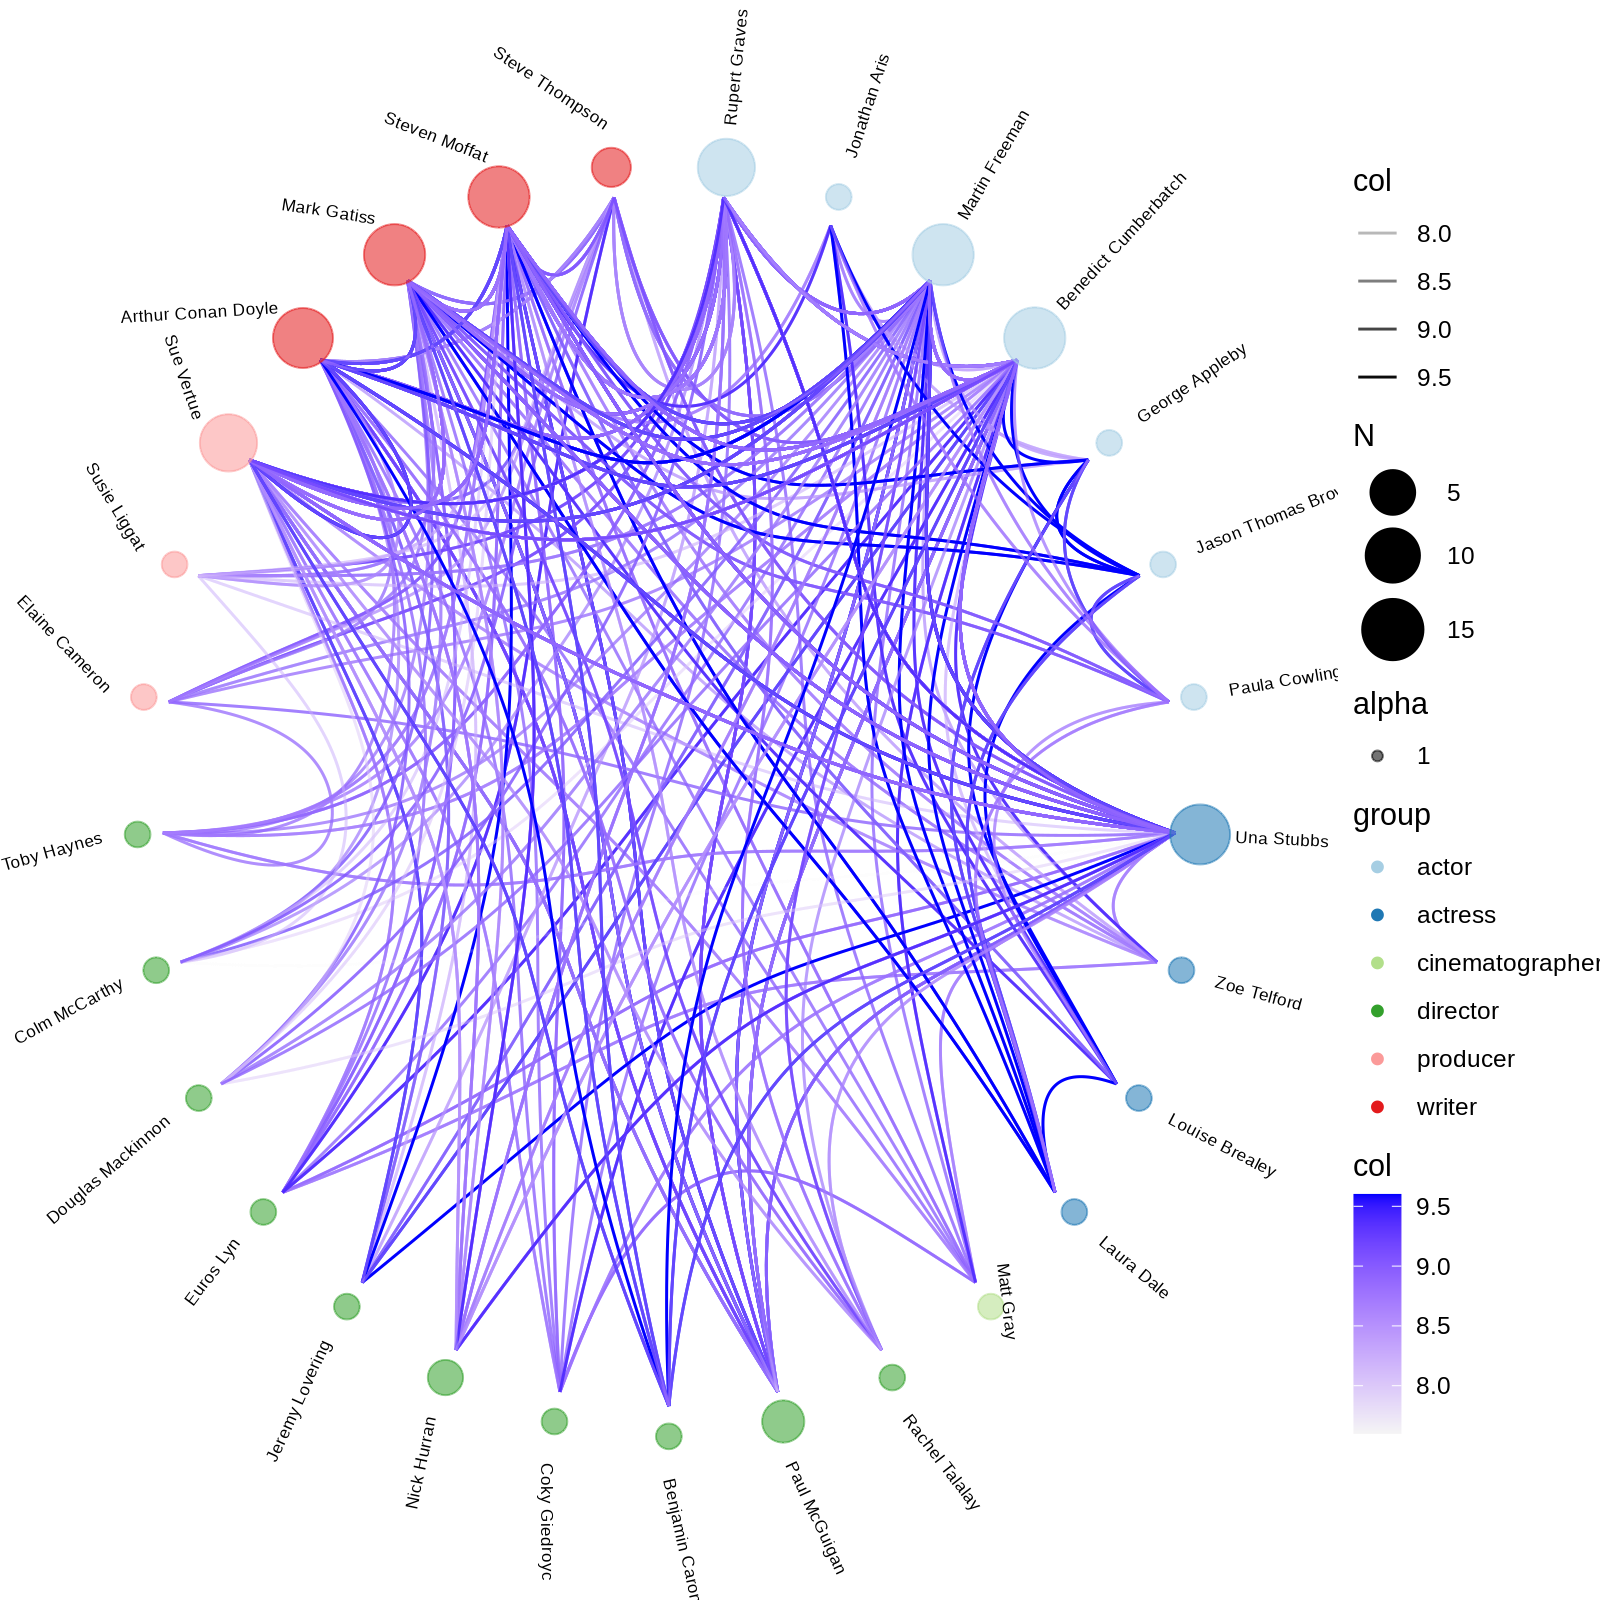

In [ ]:
#MAKING OF THE GRAPH STARTS HERE
d1 <- data.frame(from="origin", to=c("director","writer","actress", "actor","producer","cinematographer"), N=NA) #dont forget to change here :)
d2 <- data.frame(from=nodesSH$category, to=nodesSH$nconst, N=nodesSH$N)
hierarchy <- rbind(d1, d2) #edges
all_leaves <- paste("subgroup", seq(1,100), sep="_")

vertices <- data.frame(name = unique(c(as.character(hierarchy$from), as.character(hierarchy$to)))) #,value=runif(16)
vertices <- merge(vertices, nmf, by.x = "name", by.y = "nconst", all.x = TRUE) #connect with actual names,
vertices$group  <-  hierarchy$from[ match( vertices$name, hierarchy$to ) ]
vertices$N <- hierarchy$N[ match( vertices$name, hierarchy$to ) ]

setDT(vertices)
n <-vertices[name == "origin"]
o <- vertices[group == "origin"]
d <- vertices[group == "director"]
w <- vertices[group == "writer"]
a <-vertices[group == "actor"]
ac <- vertices[group == "actress"]
p <- vertices[group == "producer"]
#c <- vertices[group == "composer"]
cn <- vertices[group == "cinematographer"]
vertices <- rbind(n, o, a, ac, d, w, p, cn)    #sort them like the graph sorts them clockwise
setDF(vertices) 

connect <- justlinksSH
connect$value <-linksSH$averageRating #value is not taken from here

#Let's add information concerning the label we are going to add: angle, horizontal adjustement and potential flip
#calculate the ANGLE of the labels
vertices$id <- NA
myleaves <- which(is.na( match(vertices$name, hierarchy$from) ))
nleaves <- length(myleaves)
vertices$id[ myleaves ] <- seq(1:nleaves)
x <- 96.67    # FORMULA CALCULATE BY HAND 360 * roundup(n/2) / 2 - 90
vertices$angle <- x - 360 * vertices$id / nleaves
 
# calculate the alignment of labels: right or left
# If I am on the left part of the plot, my labels have currently an angle < -90
vertices$hjust <- ifelse( vertices$angle < -90, 1, 0)
 
# flip angle BY to make them readable
vertices$angle <- ifelse(vertices$angle < -90, vertices$angle+180, vertices$angle)

# THE ACTUAL PLOT WITH LABELS
mygraph <- graph_from_data_frame( hierarchy, vertices=vertices )

from <- match( connect$from, vertices$name) #sort vertices name first?
to <- match( connect$to, vertices$name)
col <- connect$value #fixes the value problem!

ggraph(mygraph, layout = 'dendrogram', circular = TRUE) + 
  geom_conn_bundle(data = get_con(from = from, to = to, col=col), aes(colour=col, alpha = col), tension = 0.4) +  #aes(colour=col, alpha = col, width = col)
  geom_node_point(aes(filter = leaf, x = x*1.05, y=y*1.05,colour=group, size=N, alpha=1)) +
  scale_edge_color_continuous(low="whitesmoke", high="blue") + #cons color
  scale_colour_manual(values= rep( brewer.pal(6,"Paired") , 30)) + #color of dots
  scale_size_continuous( range = c(4,10) ) + #changes the dots size
  geom_node_text(aes(x = x*1.12, y=y*1.12, filter = leaf, label=primaryName, angle = angle, hjust=hjust), size=2.2, alpha=1) +
  theme_void() +
  theme(
    plot.margin=unit(c(0,0,0,0),"cm"),
  ) +
  expand_limits(x = c(-1.2, 1.2), y = c(-1.2, 1.2))


#spalvotas perejimas???

DIFFERENT GRAPH IDEA 
- this just shows the strenght of episode connection (the rating), not how much each writer/director worked on successful titles
- make one: turim best eps, suskaiciuojam just links -> padarom vienpusi link -> suskaiciuojam kiek kartu pasikartojo tas connection -> dabar tai yra connect value

### THE EXAMPLE TAKEN

In [ ]:
set.seed(1234)
d1 <- data.frame(from="origin", to=paste("group", seq(1,10), sep=""))
d2 <- data.frame(from=rep(d1$to, each=10), to=paste("subgroup", seq(1,100), sep="_"))
edges <- rbind(d1, d2)
 
# create a dataframe with connection between leaves (individuals)
all_leaves <- paste("subgroup", seq(1,100), sep="_")
connect <- rbind( 
  data.frame( from=sample(all_leaves, 100, replace=T) , to=sample(all_leaves, 100, replace=T)), 
  data.frame( from=sample(head(all_leaves), 30, replace=T) , to=sample( tail(all_leaves), 30, replace=T)), 
  data.frame( from=sample(all_leaves[25:30], 30, replace=T) , to=sample( all_leaves[55:60], 30, replace=T)), 
  data.frame( from=sample(all_leaves[75:80], 30, replace=T) , to=sample( all_leaves[55:60], 30, replace=T)) )
connect$value <- runif(nrow(connect))
 
# create a vertices data.frame. One line per object of our hierarchy
vertices  <-  data.frame(
  name = unique(c(as.character(edges$from), as.character(edges$to))) , 
  value = runif(111)
) 
# Let's add a column with the group of each name. It will be useful later to color points
vertices$group  <-  edges$from[ match( vertices$name, edges$to ) ]

In [ ]:
vertices

In [ ]:
edges

In [ ]:
#Let's add information concerning the label we are going to add: angle, horizontal adjustement and potential flip
#calculate the ANGLE of the labels
vertices$id <- NA
myleaves <- which(is.na( match(vertices$name, edges$from) ))
nleaves <- length(myleaves)
vertices$id[ myleaves ] <- seq(1:nleaves)
vertices$angle <- 90 - 360 * vertices$id / nleaves
 
# calculate the alignment of labels: right or left
# If I am on the left part of the plot, my labels have currently an angle < -90
vertices$hjust <- ifelse( vertices$angle < -90, 1, 0)
 
# flip angle BY to make them readable
vertices$angle <- ifelse(vertices$angle < -90, vertices$angle+180, vertices$angle)

In [ ]:
mygraph <- igraph::graph_from_data_frame( edges, vertices=vertices )
 
# The connection object must refer to the ids of the leaves:
from  <-  match( connect$from, vertices$name)
to  <-  match( connect$to, vertices$name)
 
# Basic usual argument
ggraph(mygraph, layout = 'dendrogram', circular = TRUE) + 
  geom_node_point(aes(filter = leaf, x = x*1.05, y=y*1.05)) +
  geom_conn_bundle(data = get_con(from = from, to = to), alpha=0.2, colour="skyblue", width=0.9) +
  geom_node_text(aes(x = x*1.1, y=y*1.1, filter = leaf, label=name, angle = angle, hjust=hjust), size=1.5, alpha=1) +
  theme_void() +
  theme(
    legend.position="none",
    plot.margin=unit(c(0,0,0,0),"cm"),
  ) +
  expand_limits(x = c(-1.2, 1.2), y = c(-1.2, 1.2))

Warning message:
“Removed 1 row containing missing values (`geom_edge_path()`).”


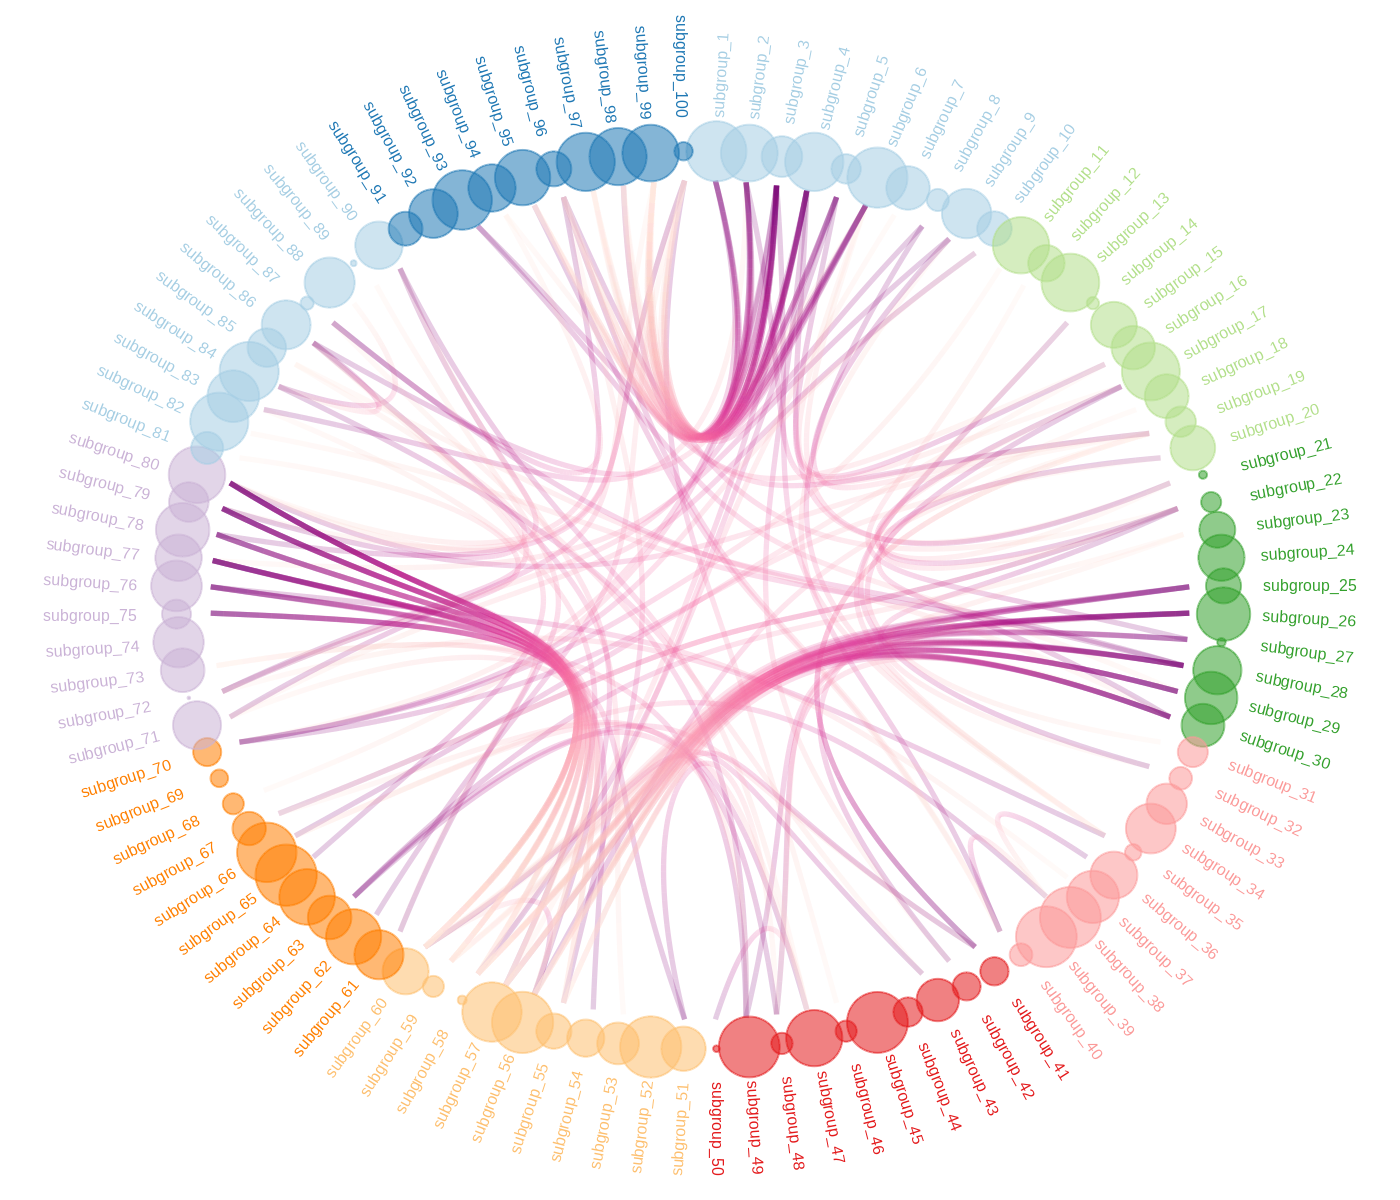

In [ ]:
ggraph(mygraph, layout = 'dendrogram', circular = TRUE) + 
  geom_conn_bundle(data = get_con(from = from, to = to), alpha=0.2, width=0.9, aes(colour=..index..)) +
  scale_edge_colour_distiller(palette = "RdPu") +
  
  geom_node_text(aes(x = x*1.15, y=y*1.15, filter = leaf, label=name, angle = angle, hjust=hjust, colour=group), size=2, alpha=1) +
  
  geom_node_point(aes(filter = leaf, x = x*1.07, y=y*1.07, colour=group, size=value, alpha=0.2)) +
  scale_colour_manual(values= rep( brewer.pal(9,"Paired") , 30)) +
  scale_size_continuous( range = c(0.1,10) ) +
  
  theme_void() +
  theme(
    legend.position="none",
    plot.margin=unit(c(0,0,0,0),"cm"),
  ) +
  expand_limits(x = c(-1.3, 1.3), y = c(-1.3, 1.3))

### Tiny example test for making the round graph

In [ ]:
DT = data.table(
  tconst = c("t1","t1","t1","t2","t1","t2"),
  nconst = c(1,2,3,3,4,5),
  category = c("director", "writer", "actor", "actor", "writer", "director"),
  averageRating = c(8,8,8,9,8,9)
)
DT

tconst nconst category averageRating
1 t1     1      director 8            
2 t1     2      writer   8            
3 t1     3      actor    8            
4 t2     3      actor    9            
5 t1     4      writer   8            
6 t2     5      director 9

In [ ]:
DTepcrew_count <- DT[, .N, by = .(nconst)]
nodesDT <- unique(DT, by = "nconst") #wait, calc how many times they repeat
nodesDT <- merge(nodesDT, DTepcrew_count, by.x = "nconst", by.y = "nconst", all=FALSE)
setorder(nodesDT, cols = "nconst")
nodesDT

nconst tconst category averageRating N
1 1      t1     director 8             1
2 2      t1     writer   8             1
3 3      t1     actor    8             2
4 4      t1     writer   8             1
5 5      t2     director 9             1

In [ ]:
linksDT <- DT %>% select(tconst, nconst, category, averageRating) %>%
  inner_join(., select(., tconst, nconst), by="tconst") %>%
  rename(FROM = nconst.x, TO = nconst.y) %>%
  filter(FROM != TO) %>%
  unique 

In [ ]:
justlinksDT <- linksDT[, .(FROM, TO)]
setnames(justlinksDT, old = c('FROM', 'TO'), 
         new = c('from','to'))
dim(justlinksDT)

[1] 14  2

In [ ]:
linksDT

tconst FROM category averageRating TO
1  t1     1    director 8             2 
2  t1     1    director 8             3 
3  t1     1    director 8             4 
4  t1     2    writer   8             1 
5  t1     2    writer   8             3 
6  t1     2    writer   8             4 
7  t1     3    actor    8             1 
8  t1     3    actor    8             2 
9  t1     3    actor    8             4 
10 t2     3    actor    9             5 
11 t1     4    writer   8             1 
12 t1     4    writer   8             2 
13 t1     4    writer   8             3 
14 t2     5    director 9             3

In [ ]:
d1 <- data.frame(from="origin", to=c("actor","director","writer"), N=NA)
d2 <- data.frame(from=nodesDT$category, to=nodesDT$nconst, N=nodesDT$N)
hierarchy <- rbind(d1, d2) #edges

vertices <- data.frame(name = unique(c(as.character(hierarchy$from), as.character(hierarchy$to))),value=runif(9))
vertices$group  <-  hierarchy$from[ match( vertices$name, hierarchy$to ) ]
vertices$N <- hierarchy$N[ match( vertices$name, hierarchy$to ) ]
#setorder(vertices, cols = "group")
#vertices <- vertices[vertices$group != "NA" & vertices$group != "origin", ]

#with each graph we have to look how vertices are sorted by groups first
setDT(vertices)
n <-vertices[name == "origin"]
o <- vertices[group == "origin"]
d <- vertices[group == "director"]
w <- vertices[group == "writer"]
a <-vertices[group == "actor"]
vertices <- rbind(n,o,d,w,a)
setDF(vertices) 

connect <- justlinksDT
connect$value <-linksDT$averageRating #value is not taken from here

In [ ]:
vertices

name     value     group    N 
1 origin   0.5183985 NA       NA
2 director 0.5965233 origin   NA
3 writer   0.3070303 origin   NA
4 actor    0.6445946 origin   NA
5 1        0.3819172 director  1
6 5        0.1978659 director  1
7 2        0.5929904 writer    1
8 4        0.3002816 writer    1
9 3        0.7947221 actor     2

In [ ]:
#Let's add information concerning the label we are going to add: angle, horizontal adjustement and potential flip
#calculate the ANGLE of the labels
vertices$id <- NA
myleaves <- which(is.na( match(vertices$name, hierarchy$from) ))
nleaves <- length(myleaves)
vertices$id[ myleaves ] <- seq(1:nleaves)
vertices$angle <- 126 - 360 * vertices$id / nleaves
 
# calculate the alignment of labels: right or left
# If I am on the left part of the plot, my labels have currently an angle < -90
vertices$hjust <- ifelse( vertices$angle < -90, 1, 0)
 
# flip angle BY to make them readable
vertices$angle <- ifelse(vertices$angle < -90, vertices$angle+180, vertices$angle)

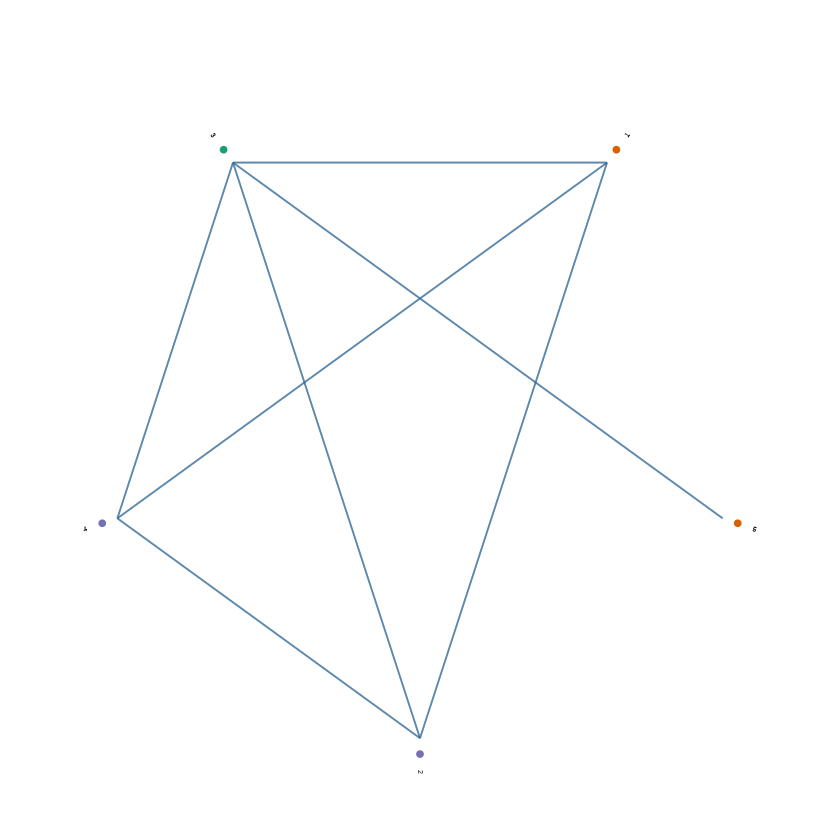

In [ ]:
mygraph <- graph_from_data_frame( hierarchy, vertices=vertices )

from <- match( connect$from, vertices$name) #sort vertices name first?
to <- match( connect$to, vertices$name)
col <- connect$value #fixes the value problem!

ggraph(mygraph, layout = 'dendrogram', circular = TRUE) + 
  geom_conn_bundle(data = get_con(from = from, to = to, col=col), aes(colour=col, alpha = col), tension = 0) + 
  geom_node_point(aes(filter = leaf, x = x*1.05, y=y*1.05,colour=group)) +
  scale_colour_manual(values= rep( brewer.pal(4,"Dark2") , 4)) +
  geom_node_text(aes(x = x*1.1, y=y*1.1, filter = leaf, label=name, angle = angle, hjust=hjust), size=1.5, alpha=1) +
  theme_void() +
  theme(
    legend.position="none",
    plot.margin=unit(c(0,0,0,0),"cm"),
  ) +
  expand_limits(x = c(-1.2, 1.2), y = c(-1.2, 1.2))

In [ ]:
vertices #VISKAS AISKU

name     value     group    N  id angle hjust
1 origin   0.5183985 NA       NA NA  NA   NA   
2 director 0.5965233 origin   NA NA  NA   NA   
3 writer   0.3070303 origin   NA NA  NA   NA   
4 actor    0.6445946 origin   NA NA  NA   NA   
5 1        0.3819172 director  1  1  54    0   
6 5        0.1978659 director  1  2 -18    0   
7 2        0.5929904 writer    1  3 -90    0   
8 4        0.3002816 writer    1  4  18    1   
9 3        0.7947221 actor     2  5 -54    1

In [ ]:
setorder(vertices, cols = group)
#vertices <- vertices[vertices$group != "NA" & vertices$group != "origin", ] 
#vertices <- vertices[
 # with(vertices, order(name, group)),
#]

In [ ]:
setDT(vertices)

In [ ]:
setDT(vertices)
o <-vertices[group == "NA"]
o <- vertices[group == "origin"]
d <- vertices[group == "director"]
w <- vertices[group == "writer"]
a <-vertices[group == "actor"]
verticesN <- rbind(n,o,d,w,a)
setDF(verticesN)

In [ ]:
verticesN

name     value      group    N  id angle hjust
1 origin   0.61436836 NA       NA NA  NA   NA   
2 actor    0.31380989 origin   NA NA  NA   NA   
3 director 0.20012561 origin   NA NA  NA   NA   
4 writer   0.90892691 origin   NA NA  NA   NA   
5 1        0.18370321 director  1  2 -18    0   
6 5        0.03824145 director  1  3 -90    0   
7 2        0.92132083 writer    1  4  18    1   
8 4        0.61353494 writer    1  5 -54    1   
9 3        0.41185982 actor     2  1  54    0

o tu dieve, pirma reik padaryt, kad rikiavimas butu director, writer, actor ??

## Do attractive popular actors have bigger ratings on average? Everything depends if the avg_rating was calculated correctly

### Box Office Stars (data from the outside!)

In [ ]:
downloaded_file <- drive_download("BoxOfficeStars.tsv")

File downloaded:

• BoxOfficeStars.tsv <id: 1Zgw5ZFxohX3qbCqGo2BnfPXtheZLXcAe>

Saved locally as:

• BoxOfficeStars.tsv



In [ ]:
bos <- fread("BoxOfficeStars.tsv")

In [ ]:
head(bos)
head(nmf)

Rank Name               WorldwideBoxOffice Movies Average     
1 1    Scarlett Johansson $14,522,754,504    34     $427,139,838
2 2    Robert Downey, Jr. $14,396,065,966    43     $334,792,232
3 3    Samuel L. Jackson  $14,366,169,081    64     $224,471,392
4 4    Chris Hemsworth    $11,945,886,832    25     $477,835,473
5 5    Chris Pratt        $11,745,130,231    21     $559,291,916
6 6    Tom Cruise         $11,546,807,794    43     $268,530,414

nconst     primaryName     birthYear deathYear
1 nm1217514  Rodrigo Ordoñez 1972      \\N      
2 nm1217515  Suze Orman      1951      \\N      
3 nm1217519  Yaky Ortega     \\N       \\N      
4 nm1217520  David Ortkiese  \\N       \\N      
5 nm12175321 Christa Biyela  \\N       \\N      
6 nm1217536  Susanna Palin   \\N       \\N      
  primaryProfession                          ratings_total avg_rating       n
1 writer,director,assistant_director            358        6.375            4
2 producer,actress                           528315        7.925            4
3 director,miscellaneous                        468        7.03333333333333 4
4 camera_department,cinematographer,director  89978        4.875            4
5 writer                                          8        7.5              1
6 assistant_director,writer,soundtrack         1741        4.5              4

### Calculating actors rating based on the episodes they appeared in

In [ ]:
head(principals)

tconst    ordering nconst    category job       
1 tt0043224 10       nm0461246 self     NA        
2 tt0043224  1       nm0804026 self     NA        
3 tt0043224  2       nm2582914 self     NA        
4 tt0043224  3       nm0319497 actor    NA        
5 tt0043224  4       nm2785822 self     NA        
6 tt0043224  5       nm0545131 writer   created by
  characters                                                         
1 ["Self - Commercials","Commercials","Blonde Nurse-Hospital Sketch"]
2 ["Self - Host","Clem Kadiddlehopper","Freddie the Freeloader"]     
3 ["Themselves","Orchestra","Singers"]                               
4 ["Announcer","Self - Announcer","Baseball Broadcaster"]            
5 ["Themselves","Can Can Dancers","Harem Dancers"]                   
6 NA

In [ ]:
unique(principals$category)

[1] "self"                "actor"               "writer"             
 [4] "actress"             "production_designer" "director"           
 [7] "composer"            "cinematographer"     "editor"             
[10] "producer"            "archive_footage"     "archive_sound"

In [ ]:
#downloaded_file <- drive_download("Top100Actors.csv")
top100m <- fread("Top100Actors.csv")
#downloaded_file <- drive_download("Top100Actresses.csv")
top100f <- fread("Top100Actresses.csv")
top100f <- top100f[1:100]
dim(top100f)
hot <- rbindlist(list(top100f, top100m))  #adding two tables vertically
hot <- hot[, .(Position,Const,Name)] 
head(hot)


[1] 100   8

Position Const     Name              
1 1        nm1312575 Olivia Wilde      
2 2        nm0817844 Abigail Spencer   
3 3        nm0004695 Jessica Alba      
4 4        nm0424060 Scarlett Johansson
5 5        nm0005154 Lucy Liu          
6 6        nm0000124 Jennifer Connelly

In [ ]:
hot_actors <- merge(hot, nmf, by.x = "Const", by.y = "nconst", all=FALSE)
head(hot_actors)

Const     Position Name           primaryName    birthYear deathYear
1 nm0000008 91       Marlon Brando  Marlon Brando  1924      2004     
2 nm0000056  9       Paul Newman    Paul Newman    1925      2008     
3 nm0000093 31       Brad Pitt      Brad Pitt      1963      \\N      
4 nm0000113 84       Sandra Bullock Sandra Bullock 1964      \\N      
5 nm0000119 50       Tia Carrere    Tia Carrere    1967      \\N      
6 nm0000123 61       George Clooney George Clooney 1961      \\N      
  primaryProfession           ratings_total avg_rating n
1 actor,soundtrack,director   2706269       8.175      4
2 actor,producer,director      411559       7.675      4
3 actor,producer,soundtrack   1764419       7.15       4
4 producer,actress,soundtrack 1722159       7          4
5 actress,soundtrack,producer  612986       7          4
6 actor,producer,director      823252       7.275      4

In [ ]:
dim(bos)

[1] 500   5

In [ ]:
bos[bos == "Robert Downey, Jr."] <- "Robert Downey Jr."

In [ ]:
#same analysis but from principals table

In [ ]:
box_actors <- merge(bos, nmf, by.x = "Name", by.y = "primaryName", all=FALSE)
head(box_actors)
dim(box_actors)

Name                     Rank WorldwideBoxOffice Movies Average     
1 Aaron Eckhart            459  $1,104,552,881     23     $48,024,038 
2 Aaron Taylor-Johnson     179  $2,522,182,027     11     $229,289,275
3 Adam Driver               70  $4,887,453,665     20     $244,372,683
4 Adam Sandler              59  $5,236,489,739     42     $124,678,327
5 Adam Sandler              59  $5,236,489,739     42     $124,678,327
6 Adewale Akinnuoye-Agbaje 466  $1,076,435,674      4     $269,108,919
  nconst    birthYear deathYear primaryProfession                     
1 nm0001173 1968      \\N       actor,producer,soundtrack             
2 nm1093951 1990      \\N       actor,producer,soundtrack             
3 nm3485845 1983      \\N       actor,soundtrack                      
4 nm1578488 \\N       \\N       director,producer,editorial_department
5 nm0001191 1966      \\N       actor,producer,writer                 
6 nm0015382 1967      \\N       actor,writer,director                 
  ratings_total avg_rating       n
1 2990723       7.25             4
2 1148121       7.175            4
3 1937133       7.475            4
4    3941       6.86666666666667 4
5  639008       6.175            4
6    1554       6.1              1

[1] 517  12

In [ ]:
actrs <- principals[category == "self" | category == "actor" |  category == "actress"]

In [ ]:
dim(actrs)

[1] 2464553       6

In [ ]:
actrs <- merge(box_actors, actrs, by.x = "nconst", by.y = "nconst", all=FALSE)

In [ ]:
episodes <- episodes[numVotes >= 500]
episodes <- episodes[,.(tconst,averageRating)]

In [ ]:
actrs <- actrs[,.(nconst, Name, Rank, tconst, category)]
actrs <- merge(actrs, episodes, by = "tconst", all=FALSE)

In [ ]:
actrs <- actrs[,mean(averageRating), by ="nconst"]

In [ ]:
head(actrs)
dim(actrs)

nconst    V1   
1 nm0004695 7.300
2 nm0461136 5.600
3 nm0001459 6.700
4 nm0000545 8.075
5 nm0267812 8.345
6 nm0000741 7.900

[1] 315   2

In [ ]:
p <- ggplot(actrs, aes(x=V1)) + 
  geom_density()
p
#average rating of box office actors

In [ ]:
hot_actors <- hot_actors[,.(Const, Name)]

In [ ]:
actors <- principals[category == "self" | category == "actor" |  category == "actress"]
actors <- merge(hot_actors, actors, by.x = "Const", by.y = "nconst", all=FALSE)
actors <- actors[,.(Const, Name, tconst, category)]
actors <- merge(actors, episodes, by = "tconst", all=FALSE)

In [ ]:
actors <- actors[,mean(averageRating), by ="Const"]

In [ ]:
p <- ggplot(actors, aes(x=V1)) + 
  geom_density()
p
#average rating of box office actors

In [ ]:
#alllll the actors from the episodes
a <- principals[category == "self" | category == "actor" |  category == "actress"]
a <- a[,.(nconst, tconst, category)]

In [ ]:
a <- merge(a, episodes, by = "tconst", all=FALSE)

In [ ]:
a <- a[,mean(averageRating), by ="nconst"]

In [ ]:
head(a)
dim(a)

nconst    V1      
1 nm0000393 6.900000
2 nm0175262 6.700000
3 nm0726223 7.800000
4 nm0162541 6.700000
5 nm0004804 5.300000
6 nm0000506 8.201389

[1] 11256     2

In [ ]:
head(actrs)
head(actors)

nconst    V1   
1 nm0004695 7.300
2 nm0461136 5.600
3 nm0001459 6.700
4 nm0000545 8.075
5 nm0267812 8.345
6 nm0000741 7.900

tconst    ordering nconst    category job
1 tt0043224 10       nm0461246 self     NA 
2 tt0043224  1       nm0804026 self     NA 
3 tt0043224  2       nm2582914 self     NA 
4 tt0043224  3       nm0319497 actor    NA 
5 tt0043224  4       nm2785822 self     NA 
6 tt0043224  6       nm0038066 actor    NA 
  characters                                                         
1 ["Self - Commercials","Commercials","Blonde Nurse-Hospital Sketch"]
2 ["Self - Host","Clem Kadiddlehopper","Freddie the Freeloader"]     
3 ["Themselves","Orchestra","Singers"]                               
4 ["Announcer","Self - Announcer","Baseball Broadcaster"]            
5 ["Themselves","Can Can Dancers","Harem Dancers"]                   
6 ["Paw Kadiddlehopper","Pa Kadiddlehopper","Muggsy"]

In [ ]:
actrs[, group := "box_office"]
actors[, group := "attractive"]
a[, group := "all"]
toplot2 <- rbindlist(list(actrs, actors,a))  #important to do if we want to get a plot:))

Column 1 ['Const'] of item 2 is missing in item 1. Use fill=TRUE to fill with NA (NULL for list columns), or use.names=FALSE to ignore column names. use.names='check' (default from v1.12.2) emits this message and proceeds as if use.names=FALSE for  backwards compatibility. See news item 5 in v1.12.2 for options to control this message.



In [ ]:
toplot2 <- toplot2[, g := "tv series"]

In [ ]:
head(toplot2)
dim(toplot2)

avg_rating group      g        
1 7.300      box_office tv series
2 5.600      box_office tv series
3 6.700      box_office tv series
4 8.075      box_office tv series
5 8.345      box_office tv series
6 7.900      box_office tv series

[1] 11688     3

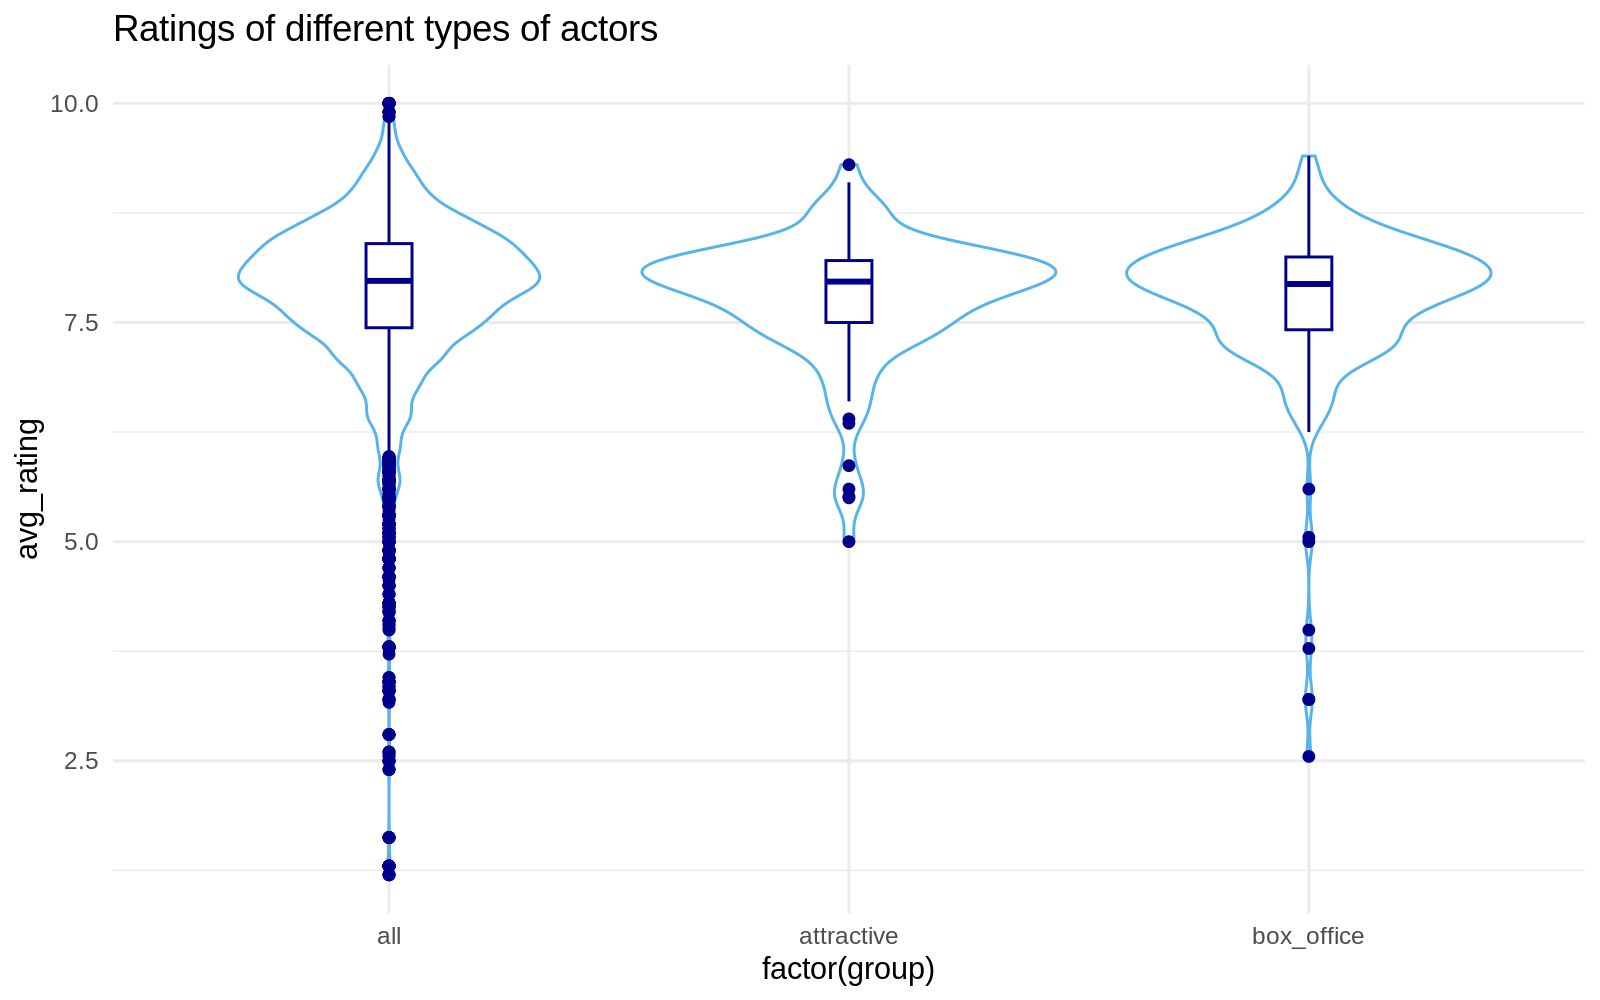

In [ ]:
p <- ggplot(toplot2, aes(x = factor(group), y = avg_rating), fig(7,12)) + geom_violin(color='#56B4E9') +
   geom_boxplot(width=0.1, color='dark blue')  + theme_minimal()  + #geom_text(data = summary, aes(x = factor(century), y = 128, label = nn)) +
   labs(title = 'Ratings of different types of actors')
p #TODO put the n num
#NUMBER OF EP VOTES >500

### Box office actors

In [ ]:
#ALL ACTORS

In [ ]:
a <- principals[category == "self" | category == "actor" |  category == "actress"]
a <- a[,.(nconst, tconst, category)]
a <- unique(a, by="nconst")
a <- merge(a, nmf, by = "nconst", all=FALSE)
a <- a[,.(nconst, primaryName, avg_rating)]

In [ ]:
head(nmf)

nconst     primaryName     birthYear deathYear
1 nm1217514  Rodrigo Ordoñez 1972      \\N      
2 nm1217515  Suze Orman      1951      \\N      
3 nm1217519  Yaky Ortega     \\N       \\N      
4 nm1217520  David Ortkiese  \\N       \\N      
5 nm12175321 Christa Biyela  \\N       \\N      
6 nm1217536  Susanna Palin   \\N       \\N      
  primaryProfession                          ratings_total avg_rating       n
1 writer,director,assistant_director            358        6.375            4
2 producer,actress                           528315        7.925            4
3 director,miscellaneous                        468        7.03333333333333 4
4 camera_department,cinematographer,director  89978        4.875            4
5 writer                                          8        7.5              1
6 assistant_director,writer,soundtrack         1741        4.5              4

In [ ]:
head(a)
dim(a)

nconst    primaryName      avg_rating
1 nm0000002 Lauren Bacall    7.4       
2 nm0000003 Brigitte Bardot  6.725     
3 nm0000018 Kirk Douglas     7.475     
4 nm0000030 Audrey Hepburn   7.825     
5 nm0000032 Charlton Heston  7.35      
6 nm0000033 Alfred Hitchcock 8.25

[1] 127495      3

In [ ]:
box_actors <- merge(bos, a, by.x = "Name", by.y = "primaryName", all=FALSE)
box_actors <- box_actors[,.(nconst,Name,avg_rating)]

In [ ]:
head(box_actors)
dim(box_actors)

nconst    Name                     avg_rating
1 nm0001173 Aaron Eckhart            7.25      
2 nm1093951 Aaron Taylor-Johnson     7.175     
3 nm3485845 Adam Driver              7.475     
4 nm0001191 Adam Sandler             6.175     
5 nm0015382 Adewale Akinnuoye-Agbaje 6.1       
6 nm0000199 Al Pacino                7.775

[1] 493   3

In [ ]:
#ATTRACTIVE
at <- merge(hot, a, by.x = "Name", by.y = "primaryName", all=FALSE)
at <- at[,.(nconst,Name,avg_rating)]

In [ ]:
head(at)
dim(at)

nconst    Name                 avg_rating
1 nm1093951 Aaron Taylor-Johnson 7.175     
2 nm0817844 Abigail Spencer      7.325     
3 nm0004778 Adrien Brody         8         
4 nm0000614 Alan Rickman         7.625     
5 nm0005123 Ali Larter           5.9       
6 nm1395602 Allen Leech          8

[1] 189   3

In [ ]:
setnames(a, "primaryName", "Name")

In [ ]:
at <- unique(at, by="nconst")
box_actors <- unique(box_actors, by="nconst")

In [ ]:
box_actors[, group := "box_office"]
at[, group := "attractive"]
a[, group := "all"]
toplot <- rbindlist(list(a, at,box_actors))  #important to do if we want to get a plot:))

In [ ]:
toplot <- toplot[,.(avg_rating,group)]
#toplot <- as.data.frame(toplot)

In [ ]:
toplot$avg_rating <- as.numeric(toplot$avg_rating)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [ ]:
unique(toplot$group)

[1] "all"        "attractive" "box_office"

In [ ]:
toplot1 <- toplot[, g := "everything"]

In [ ]:
toplot2 <- toplot2[,.(V1, group, g)]
setnames(toplot2, "V1", "avg_rating")

In [ ]:
head(toplot1)
head(toplot2)

avg_rating group g         
1 7.400      all   everything
2 6.725      all   everything
3 7.475      all   everything
4 7.825      all   everything
5 7.350      all   everything
6 8.250      all   everything

avg_rating group      g        
1 7.300      box_office tv series
2 5.600      box_office tv series
3 6.700      box_office tv series
4 8.075      box_office tv series
5 8.345      box_office tv series
6 7.900      box_office tv series

Warning message:
“Removed 1727 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 1727 rows containing non-finite values (`stat_boxplot()`).”


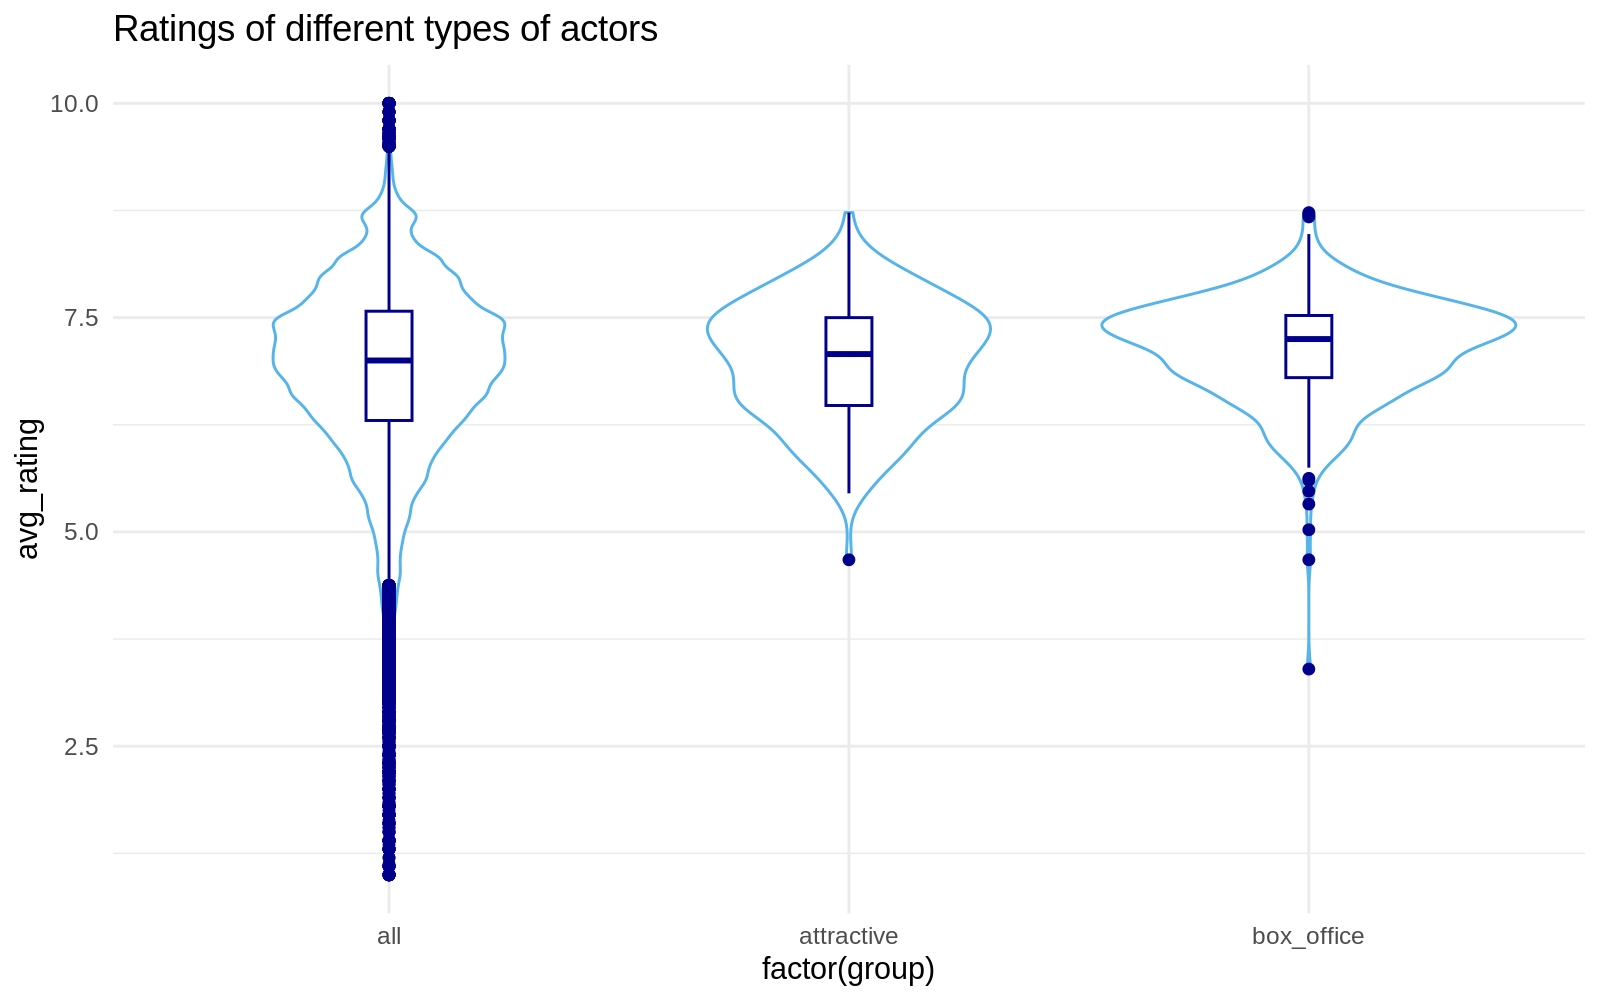

In [ ]:
p <- ggplot(toplot, aes(x = factor(group), y = avg_rating)) + geom_violin(color='#56B4E9') +
   geom_boxplot(width=0.1, color='dark blue')  + theme_minimal()  + #geom_text(data = summary, aes(x = factor(century), y = 128, label = nn)) +
   labs(title = 'Ratings of different types of actors')
p 

### plotting together

In [ ]:
install.packages("hrbrthemes")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘extrafontdb’, ‘Rttf2pt1’, ‘Rcpp’, ‘extrafont’, ‘gdtools’


Warning message in install.packages("hrbrthemes"):
“installation of package ‘gdtools’ had non-zero exit status”
Warning message in install.packages("hrbrthemes"):
“installation of package ‘hrbrthemes’ had non-zero exit status”


In [ ]:
library(forcats)
library(hrbrthemes)
library(viridis)

ERROR: ignored

In [ ]:
toplotall <- rbindlist(list(toplot1, toplot2))

In [ ]:
size = toplotall %>% group_by(g,group) %>% summarize(n=n())

`summarise()` has grouped output by 'g'. You can override using the `.groups`
argument.


In [ ]:
size <- data.table(size)
size[, nn := paste("n =", n)]
size

g          group      n      nn        
1 everything all        127495 n = 127495
2 everything attractive    189 n = 189   
3 everything box_office    493 n = 493   
4 tv series  all         11256 n = 11256 
5 tv series  attractive    117 n = 117   
6 tv series  box_office    315 n = 315

In [ ]:
DT = data.table(
  g = c("all", "attractive", "box_office"),
  l = c("n = 127495       n = 11256", "n = 189       n = 117", "n = 493       n = 315"))
   

In [ ]:
DT

g          l                         
1 all        n = 127495       n = 11256
2 attractive n = 189       n = 117     
3 box_office n = 493       n = 315

In [ ]:
# let's increase the size of the plot
options(repr.plot.width=5, repr.plot.height=3, repr.plot.res = 200)

In [ ]:
head(toplotall)

avg_rating group g         
1 7.400      all   everything
2 6.725      all   everything
3 7.475      all   everything
4 7.825      all   everything
5 7.350      all   everything
6 8.250      all   everything

Warning message in geom_violin(position = position_dodge(0.75), alpha = 0.5, outlier.colour = "transparent"):
“Ignoring unknown parameters: `outlier.colour`”
Warning message:
“Removed 1727 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 1727 rows containing non-finite values (`stat_boxplot()`).”


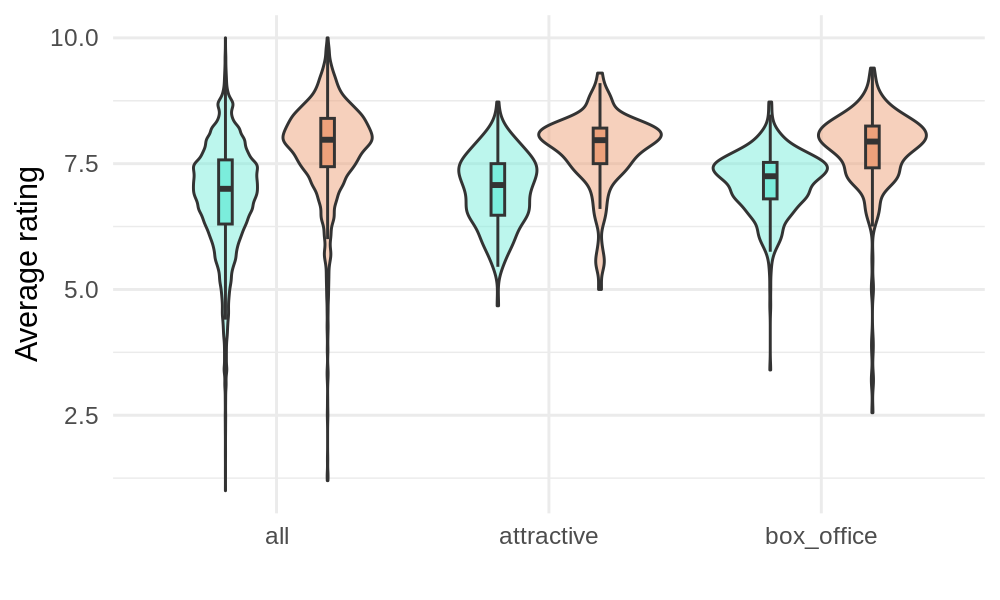

In [ ]:
p <- ggplot(toplotall, aes(x = group, y = avg_rating, fill = g)) + 
   geom_violin(position=position_dodge(0.75), alpha = 0.5,outlier.colour="transparent") +
   geom_boxplot(width=0.1,outlier.colour="transparent",position=position_dodge(0.75))  +
   scale_fill_manual(values=c("#7beddc", "#eda17b", "#eda17b", "#7beddc", "#eda17b")) + 
   theme_minimal()  + #geom_text(data = DT, aes(x = g, y = 0.7, label = l)) +
   xlab("") +
   ylab("Average rating") +
   theme(legend.position = "none")
p 
#THIS WORKED BEFORE AND RUNNING THE FINAL TIME IT STOPPED...

In [ ]:
p <- ggplot(toplotall, aes(x = group, y = avg_rating, fill = g)) + geom_violin(position="dodge", alpha = 0.5,outlier.colour="transparent") +
   geom_boxplot(width=0.1, color='dark blue',outlier.colour="transparent")  + theme_minimal()  + geom_text(data = DT, aes(x = group, y = 0.7, label = l)) +
   xlab("") +
   ylab("Average rating") 
p 

Warning message in geom_violin(position = "dodge", alpha = 0.5, outlier.colour = "transparent"):
“Ignoring unknown parameters: `outlier.colour`”
ERROR while rich displaying an object: Error in `geom_text()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 3rd layer.
Caused by error in `FUN()`:
! object 'g' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr 

In [ ]:
ggplot(df, aes(x=var1, y=value, fill = var2, group = interaction(var1,var2))) +
geom_violin(width=0.9, position=position_dodge(0.75), bw=1.5) +
geom_boxplot(width=0.3, outlier.shape = NA, position=position_dodge(0.75))

In [ ]:
head(toplotall)
dim(toplotall)

avg_rating group g         
1 7.400      all   everything
2 6.725      all   everything
3 7.475      all   everything
4 7.825      all   everything
5 7.350      all   everything
6 8.250      all   everything

[1] 139865      3

### Old code (IGNORE)

In [ ]:
#box_actors <- box_actors %>% mutate(primaryProfession = strsplit(primaryProfession, split=','))
head(box_actors,10)
dim(box_actors)

Name                     Rank WorldwideBoxOffice Movies Average     
1  Aaron Eckhart            459  $1,104,552,881     23     $48,024,038 
2  Aaron Taylor-Johnson     179  $2,522,182,027     11     $229,289,275
3  Adam Driver               70  $4,887,453,665     20     $244,372,683
4  Adam Sandler              59  $5,236,489,739     42     $124,678,327
5  Adam Sandler              59  $5,236,489,739     42     $124,678,327
6  Adewale Akinnuoye-Agbaje 466  $1,076,435,674      4     $269,108,919
7  Al Pacino                195  $2,402,150,961     44     $54,594,340 
8  Alan Rickman             197  $2,375,267,745      9     $263,918,638
9  Alan Tudyk               150  $2,987,122,326      9     $331,902,481
10 Albert Brooks            264  $1,873,758,230      6     $312,293,038
   nconst    birthYear deathYear primaryProfession                     
1  nm0001173 1968      \\N       actor,producer,soundtrack             
2  nm1093951 1990      \\N       actor,producer,soundtrack             
3  nm3485845 1983      \\N       actor,soundtrack                      
4  nm1578488 \\N       \\N       director,producer,editorial_department
5  nm0001191 1966      \\N       actor,producer,writer                 
6  nm0015382 1967      \\N       actor,writer,director                 
7  nm0000199 1940      \\N       actor,producer,soundtrack             
8  nm0000614 1946      2016      actor,soundtrack,writer               
9  nm0876138 1971      \\N       actor,writer,producer                 
10 nm0000983 1947      \\N       actor,writer,director                 
   ratings_total avg_rating       n
1  2990723       7.25             4
2  1148121       7.175            4
3  1937133       7.475            4
4     3941       6.86666666666667 4
5   639008       6.175            4
6     1554       6.1              1
7  2276766       7.775            4
8  2297834       7.625            4
9  1615758       7.7              4
10  693770       7.3              4

[1] 516  12

In [ ]:
box_actors <- box_actors %>% separate(primaryProfession, c('pp1', 'pp2','pp3')) #a way to split nicely

In [ ]:
head(box_actors)

In [ ]:
unique(box_actors$pp1)

[1] "actor"         "director"      "actress"       "soundtrack"   
 [5] "writer"        "producer"      "animation"     "visual"       
 [9] ""              "script"        "editor"        "miscellaneous"
[13] "music"

In [ ]:
#not necessary to do this imo
#box_actors <- merge(box_actors, principals, by.x = "nconst", by.y = "nconst", all=FALSE)

In [ ]:
#baf <- box_actors[pp1 == 'actor' | pp2 == 'actor' | pp3 == 'actor' | pp1 == 'actress' | pp2 == 'actress'| pp3 == 'actress'] some are still duplicates...
baf <- box_actors[pp1 == 'actor' | pp1 == 'actress']
head(baf)
dim(baf)

In [ ]:
setorder(baf, cols = "Rank") #fast way to order a data table
head(baf)

In [ ]:
baf100 <- baf[1:100]
head(baf100)
dim(baf100)

Name               Rank WorldwideBoxOffice Movies Average      nconst   
1 Scarlett Johansson 1    $14,522,754,504    34     $427,139,838 nm0424060
2 Robert Downey Jr.  2    $14,396,065,966    43     $334,792,232 nm0000375
3 Samuel L. Jackson  3    $14,366,169,081    64     $224,471,392 nm0000168
4 Chris Hemsworth    4    $11,945,886,832    25     $477,835,473 nm1165110
5 Chris Pratt        5    $11,745,130,231    21     $559,291,916 nm0695435
6 Tom Cruise         6    $11,546,807,794    43     $268,530,414 nm0000129
  birthYear deathYear pp1     pp2        pp3        ratings_total avg_rating n
1 1984      \\N       actress soundtrack producer   2582870       7.5        4
2 1965      \\N       actor   producer   soundtrack 3902151       7.65       4
3 1948      \\N       actor   producer   soundtrack 3311403       7.25       4
4 1983      \\N       actor   producer   soundtrack 3012517       7.475      4
5 1979      \\N       actress soundtrack producer   2090529       7.6        4
6 1962      \\N       actor   producer   soundtrack 1475417       7.025      4

[1] 100  14

In [ ]:
#for plotting
#baf100_toplot <- baf100[, .(Rank,ratings_total, avg_rating)]
baf100_toplot <- baf100[, avg_rating]
baf100_toplot <- data.frame(baf100_toplot)
#baf100_toplot I am plotting more stuff together later

**IT WILL BE PLOTTED LATER**

### Box office stars compared to "attractive stars"

In [ ]:
downloaded_file <- drive_download("Top100Actors.csv")
top100m <- fread("Top100Actors.csv")
downloaded_file <- drive_download("Top100Actresses.csv")
top100f <- fread("Top100Actresses.csv")
top100f <- top100f[1:100]
dim(top100f)
hot <- rbindlist(list(top100f, top100m))  #adding two tables vertically
hot <- hot[, .(Position,Const,Name)] 
head(hot)

File downloaded:

• Top100Actors.csv <id: 1EXmyPguOdqE3sg5PPSSzUWn4EUUWZKA0>

Saved locally as:

• Top100Actors.csv



In [ ]:
top100m <- fread("Top100Actors.csv")

In [ ]:
downloaded_file <- drive_download("Top100Actresses.csv")
top100f <- fread("Top100Actresses.csv")

File downloaded:

• Top100Actresses.csv <id: 1wjsAa1mP9kaX9KiOBOZb3O6y3csg4u2F>

Saved locally as:

• Top100Actresses.csv



In [ ]:
top100f <- top100f[1:100]
dim(top100f)

[1] 100   8

In [ ]:
#top 200 attractive actors and actresses
hot <- rbindlist(list(top100f, top100m))  #adding two tables vertically
hot <- hot[, .(Position,Const,Name)] 
head(hot)

Position Const     Name              
1 1        nm1312575 Olivia Wilde      
2 2        nm0817844 Abigail Spencer   
3 3        nm0004695 Jessica Alba      
4 4        nm0424060 Scarlett Johansson
5 5        nm0005154 Lucy Liu          
6 6        nm0000124 Jennifer Connelly

In [ ]:
hot_actors <- merge(hot, nmf, by.x = "Const", by.y = "nconst", all=FALSE)
head(hot_actors)
dim(hot_actors)

Const     Position Name           primaryName    birthYear deathYear
1 nm0000008 91       Marlon Brando  Marlon Brando  1924      2004     
2 nm0000056  9       Paul Newman    Paul Newman    1925      2008     
3 nm0000093 31       Brad Pitt      Brad Pitt      1963      \\N      
4 nm0000113 84       Sandra Bullock Sandra Bullock 1964      \\N      
5 nm0000119 50       Tia Carrere    Tia Carrere    1967      \\N      
6 nm0000123 61       George Clooney George Clooney 1961      \\N      
  primaryProfession           ratings_total avg_rating n
1 actor,soundtrack,director   2706269       8.175      4
2 actor,producer,director      411559       7.675      4
3 actor,producer,soundtrack   1764419       7.15       4
4 producer,actress,soundtrack 1722159       7          4
5 actress,soundtrack,producer  612986       7          4
6 actor,producer,director      823252       7.275      4

[1] 182  10

In [ ]:
hot_in_baf <- merge(hot, baf100, by.x = "Const", by.y = "nconst", all=FALSE)

In [ ]:
head(hot_in_baf) #27 of them already in baf100
const_to_delete <- hot_in_baf$Const
const_to_delete

Const     Position Name.x            Name.y            Rank
1 nm0000093 31       Brad Pitt         Brad Pitt         36  
2 nm0000123 61       George Clooney    George Clooney    79  
3 nm0000129 89       Tom Cruise        Tom Cruise         6  
4 nm0000136 24       Johnny Depp       Johnny Depp       12  
5 nm0000138 25       Leonardo DiCaprio Leonardo DiCaprio 32  
6 nm0000139 92       Cameron Diaz      Cameron Diaz      49  
  WorldwideBoxOffice Movies Average      birthYear deathYear pp1     pp2     
1 $6,859,342,026     43     $159,519,582 1963      \\N       actor   producer
2 $4,704,932,208     34     $138,380,359 1961      \\N       actor   producer
3 $11,546,807,794    43     $268,530,414 1962      \\N       actor   producer
4 $10,323,947,911    52     $198,537,460 1963      \\N       actor   producer
5 $7,101,486,511     27     $263,018,019 1974      \\N       actor   producer
6 $5,827,319,895     28     $208,118,568 1972      \\N       actress producer
  pp3        ratings_total avg_rating n
1 soundtrack 1764419       7.15       4
2 director    823252       7.275      4
3 soundtrack 1475417       7.025      4
4 soundtrack 2849164       7.45       4
5 soundtrack 6176430       8.35       4
6 soundtrack  908733       6.475      4

[1] "nm0000093" "nm0000123" "nm0000129" "nm0000136" "nm0000138" "nm0000139"
 [7] "nm0000146" "nm0000179" "nm0000191" "nm0000204" "nm0000206" "nm0000210"
[13] "nm0000246" "nm0000288" "nm0000553" "nm0000569" "nm0001401" "nm0005562"
[19] "nm0177896" "nm0185819" "nm0413168" "nm0424060" "nm0461136" "nm0705356"
[25] "nm0719637" "nm0757855" "nm1500155"

In [ ]:
head(baf)

In [ ]:
#so not that many
#let's make two seperate tables where the person does not repeat, aka remove them from baf table
#data <- data[ menuitem != 'coffee' | amount > 0] 
baf <- baf[nconst != const_to_delete]

Warning message in nconst != const_to_delete:
“longer object length is not a multiple of shorter object length”


In [ ]:
bafnohot <- baf[ !(baf$nconst %in% const_to_delete), ] #nice way to delete rows on condition

In [ ]:
dim(bafnohot) #412 + 27 = 439 correct

[1] 412  14

In [ ]:
head(bafnohot) #whoever made the "attractive" people list, doesn't have eyes

Name              Rank WorldwideBoxOffice Movies Average      nconst   
1 Robert Downey Jr.  2   $14,396,065,966    43     $334,792,232 nm0000375
2 Samuel L. Jackson  3   $14,366,169,081    64     $224,471,392 nm0000168
3 Chris Hemsworth    4   $11,945,886,832    25     $477,835,473 nm1165110
4 Chris Pratt        5   $11,745,130,231    21     $559,291,916 nm0695435
5 Chris Evans        7   $11,280,741,759    29     $388,991,095 nm0262635
6 Dwayne Johnson    13   $10,164,132,252    36     $282,337,007 nm0425005
  birthYear deathYear pp1     pp2        pp3        ratings_total avg_rating n
1 1965      \\N       actor   producer   soundtrack 3902151       7.65       4
2 1948      \\N       actor   producer   soundtrack 3311403       7.25       4
3 1983      \\N       actor   producer   soundtrack 3012517       7.475      4
4 1979      \\N       actress soundtrack producer   2090529       7.6        4
5 1981      \\N       actor   producer   soundtrack 3849918       7.5        4
6 1972      \\N       actor   producer   soundtrack  995234       6.475      4

In [ ]:
bafnohot[Name == "Brad Pitt"] #correct, he shouldn't be here

Name Rank WorldwideBoxOffice Movies Average nconst birthYear deathYear pp1
     pp2 pp3 ratings_total avg_rating n

In [ ]:
bafnohot <- bafnohot[, .(ratings_total, avg_rating)]
dim(bafnohot)
hot_in_baf <- hot_in_baf[, .(ratings_total, avg_rating)]
dim(hot_in_baf)
hot_actors <- hot_actors[, .(ratings_total, avg_rating)]
dim(hot_actors)

[1] 412   2

[1] 27  2

[1] 182   2

In [ ]:
bafnohot[, group := "bafnohot"]
hot_actors[, group := "hot"]
hot_in_baf[,group := "hotbaf"]
toplot <- rbindlist(list(bafnohot, hot_actors, hot_in_baf))  #important to do if we want to get a plot:))

In [ ]:
toplot$avg_rating <- as.numeric(toplot$avg_rating)
head(toplot)

ratings_total avg_rating group   
1 3902151       7.650      bafnohot
2 3311403       7.250      bafnohot
3 3012517       7.475      bafnohot
4 2090529       7.600      bafnohot
5 3849918       7.500      bafnohot
6  995234       6.475      bafnohot

In [ ]:
fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}

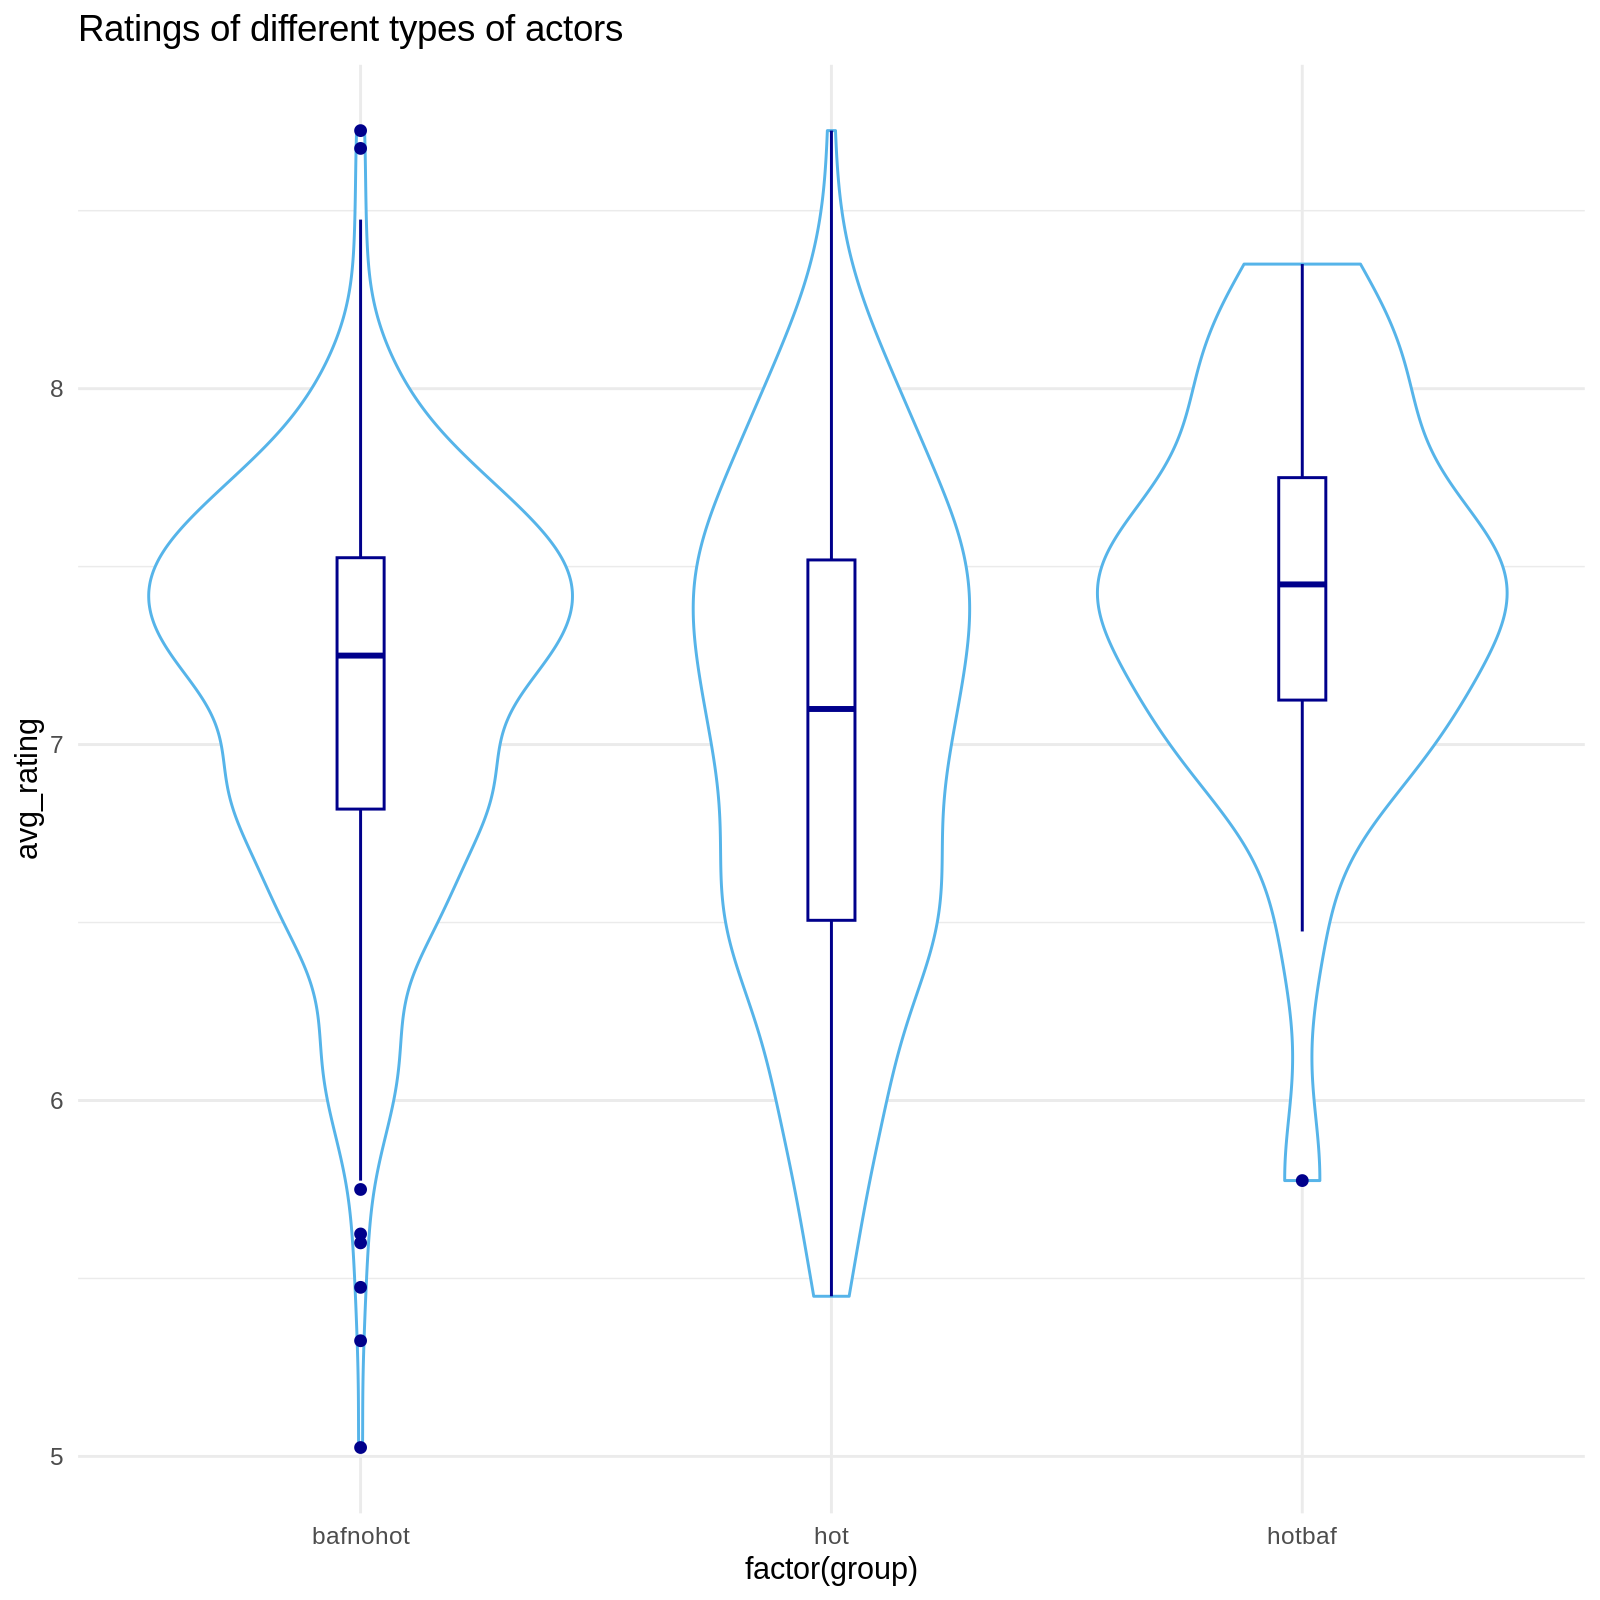

In [ ]:
p <- ggplot(toplot, aes(x = factor(group), y = avg_rating), fig(7,12)) + geom_violin(color='#56B4E9') +
   geom_boxplot(width=0.1, color='dark blue')  + theme_minimal()  + #geom_text(data = summary, aes(x = factor(century), y = 128, label = nn)) +
   labs(title = 'Ratings of different types of actors')
p #TODO put the n num

In [ ]:
p <- ggplot(toplot, aes(x = factor(group), y = ratings_total), fig(17,10)) + geom_violin(color='#56B4E9') +
   geom_boxplot(width=0.1, color='dark blue')  + theme_minimal()  + #geom_text(data = summary, aes(x = factor(century), y = 128, label = nn)) +
   labs(title = 'Number of ratings of different types of actors')
p #TODO put the n num
#TODO interesting to point out outliers
#TODO compare with average sample 

In [ ]:
#EXAMPLE CODE FROM GALLERY
library(hrbrthemes)
library(viridis)

# create a dataset
data <- data.frame(
  name=c( rep("A",500), rep("B",500), rep("B",500), rep("C",20), rep('D', 100)  ),
  value=c( rnorm(500, 10, 5), rnorm(500, 13, 1), rnorm(500, 18, 1), rnorm(20, 25, 4), rnorm(100, 12, 1) )
)

# sample size
sample_size = data %>% group_by(name) %>% summarize(num=n())

# Plot
data %>%
  left_join(sample_size) %>%
  mutate(myaxis = paste0(name, "\n", "n=", num)) %>%
  ggplot( aes(x=myaxis, y=value, fill=name)) +
    geom_violin(width=1.4) +
    geom_boxplot(width=0.1, color="grey", alpha=0.2) +
    scale_fill_viridis(discrete = TRUE) +
    theme_ipsum() +
    theme(
      legend.position="none",
      plot.title = element_text(size=11)
    ) +
    ggtitle("A Violin wrapping a boxplot") +
    xlab("")
